Kelompok A:
- Muhammad Ezra Arziansah (11230940000008)
- Azahra Aulia Jenar (11230940000036)
- Nabila Khansa Raefa: (11230940000020)
- SIti Aminah (11230940000068)

# LOAD DATA

In [1]:
%%capture
!wget https://raw.githubusercontent.com/EzraArzi23/CAPSTONE-2/main/Data_MixITup.csv

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI
from sklearn.cluster import KMeans

df = pd.read_csv('Data_MixITup.csv', sep=';')
df

# Base Data

In [2]:
df_clean = df.copy()

In [3]:
df_clean.head() #5 Baris Awal

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,"Rp13,114,754",52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,"Rp33,606,557",86,1,Depok,1.0,Minggu,6
2,103,Pria,51,"Rp15,983,606",41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,"Rp12,704,918",55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,"Rp20,081,967",42,1,Jakarta,2.0,Senin,8


In [4]:
df_clean.sample(5) #5 Baris random

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,"Rp13,114,754",52,1,Jakarta,1.0,Sabtu,2
46,147,Wanita,18,"Rp20,491,803",48,0,Jakarta,2.0,Selasa,0
176,277,Pria,25,"Rp25,409,836",12,1,Tangerang,3.0,Senin,8
125,226,Pria,29,"Rp5,327,868",82,1,Depok,1.0,Senin,1
140,241,Wanita,50,"Rp21,311,475",57,NaN,Jakarta,1.0,Sabtu,1


In [5]:
df_clean.tail() #5 baris akhir

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
195,296,Pria,31,"Rp4,098,360",73,1,Depok,1.0,Senin,0
196,297,Pria,57,"Rp15,983,606",51,1,Jakarta,1.0,Minggu,5
197,298,Wanita,35,"Rp43,032,786",79,1,Depok,1.0,Senin,7
198,299,Wanita,23,"Rp1,229,508",94,1,Depok,0.0,Selasa,0
199,300,Pria,50,"Rp1,639,344",14,1,Tangerang,3.0,Minggu,6


In [6]:
df_clean.info() #tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    200 non-null    int64  
 1   Jenis Kelamin         196 non-null    object 
 2   Umur                  200 non-null    object 
 3   Pendapatan-per-bulan  200 non-null    object 
 4   skor-pengeluaran      200 non-null    int64  
 5   Menikah               188 non-null    object 
 6   Kota                  200 non-null    object 
 7   Promo                 194 non-null    float64
 8   HariFav               200 non-null    object 
 9   FavFlavor             200 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 15.8+ KB


In [7]:
df_clean.shape

(200, 10)

In [8]:
#Cek unik value setiap kolom
for i in df_clean.columns:
  print(f'-----{i}-----')
  print(f'{df_clean[i].unique()}\n')

-----ID-----
[101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190
 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226
 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244
 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262
 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280
 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298
 299 300]

-----Jenis Kelamin-----
['Wanita' 'Pria' nan '-']

-----Umur-----
['49' '32' '51' '19' '38' '33' '27' '24' '21' '31' '36' '46' '60' '58'
 '47' '45' '22' '18' '59' '44' '39' 

In [9]:
#noise umur
df_clean.loc[df_clean['Umur'] == "35'", 'Umur'] = "35"
df_clean['Umur'] = pd.to_numeric(df_clean['Umur'])

In [10]:
df_clean[df_clean['Umur'] == '2']    #Hapus data tidak wajar
df_clean.drop(index = 119, inplace = True)

In [11]:
# Format Pendapatan-Per-Bulan
df_clean['Pendapatan-per-bulan'] = (
    df_clean['Pendapatan-per-bulan'].astype(str)
    .str.replace(r'[^0-9]', '', regex = True)
    .astype(int))

In [12]:
# Noise Jenis Kelamin
df_clean['Jenis Kelamin'].replace('-', np.nan, inplace = True)

In [13]:
# Noise Menikah
df_clean.loc[df_clean['Menikah'] == '-', 'Menikah'] = "0"
df_clean.loc[df_clean['Menikah'] == ' ', 'Menikah'] = "0"

In [14]:
# Noise Skor Pengeluaran
df_clean[df_clean['skor-pengeluaran'] > 100]
df_clean.drop(index = 126, inplace = True)

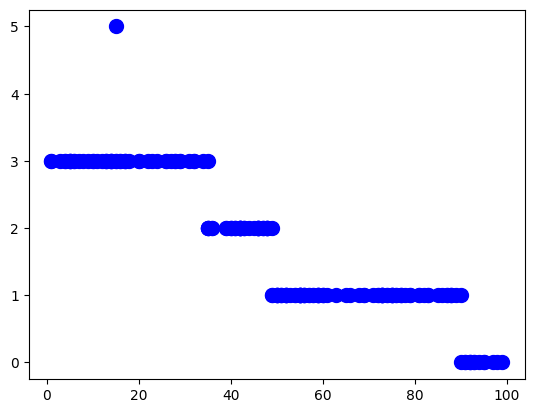

In [15]:
# Noise Promo
plt.scatter(df_clean['skor-pengeluaran'], df_clean['Promo'], color='blue', marker='o', s=100)  # Hubungan skor-pengeluaran dengan Promo

In [16]:
df_clean.groupby('Promo')['skor-pengeluaran'].mean()

,skor-pengeluaran
Promo,
0.0,93.714286
1.0,66.162791
2.0,42.707317
3.0,16.080000
5.0,15.000000


In [17]:
df_clean[df_clean['Promo'] == 5]

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
14,115,Wanita,58,2049180,15,1,Tangerang,5.0,Sabtu,8


In [18]:
df_clean.loc[df_clean['Promo'] == 5, 'Promo'] = 3

In [19]:
# Noise FavFlavor
df_clean[df_clean['FavFlavor'] > 8]
df_clean.drop(index = 130, inplace = True)

In [20]:
# Noise Kota
df_clean['Kota'] = df_clean['Kota'].replace({'JJakarta': 'Jakarta'})

In [21]:
#BASE DATA
df_clean

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6
2,103,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...,...
195,296,Pria,31,4098360,73,1,Depok,1.0,Senin,0
196,297,Pria,57,15983606,51,1,Jakarta,1.0,Minggu,5
197,298,Wanita,35,43032786,79,1,Depok,1.0,Senin,7
198,299,Wanita,23,1229508,94,1,Depok,0.0,Selasa,0


## EDA BASE DATA

In [22]:
df_eda = df_clean.copy()

In [23]:
df_eda.drop(columns='ID', inplace = True)

In [24]:
df_eda['Jenis Kelamin'] = df_eda['Jenis Kelamin'].astype('category')
df_eda['Menikah'] = df_eda['Menikah'].astype('category')
df_eda['Promo'] = df_eda['Promo'].astype('category')
df_eda['FavFlavor'] = df_eda['FavFlavor'].astype('category')

In [25]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Jenis Kelamin         192 non-null    category
 1   Umur                  197 non-null    int64   
 2   Pendapatan-per-bulan  197 non-null    int64   
 3   skor-pengeluaran      197 non-null    int64   
 4   Menikah               186 non-null    category
 5   Kota                  197 non-null    object  
 6   Promo                 191 non-null    category
 7   HariFav               197 non-null    object  
 8   FavFlavor             197 non-null    category
dtypes: category(4), int64(3), object(2)
memory usage: 10.8+ KB


In [26]:
df_eda.dropna(subset = ['Jenis Kelamin', 'Menikah'], inplace = True)

In [27]:
df_eda.duplicated().sum()

np.int64(0)

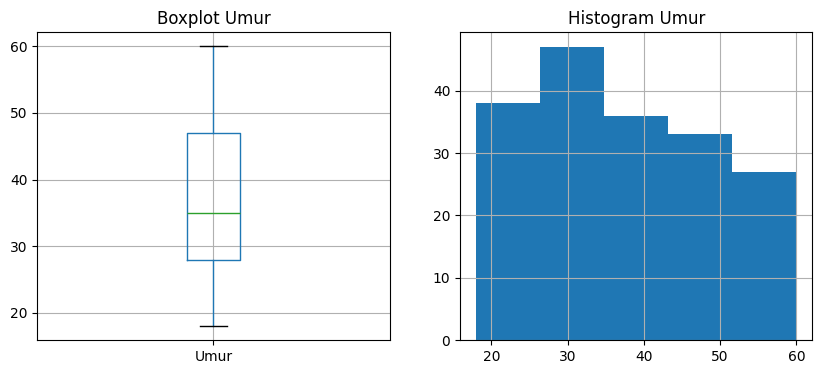

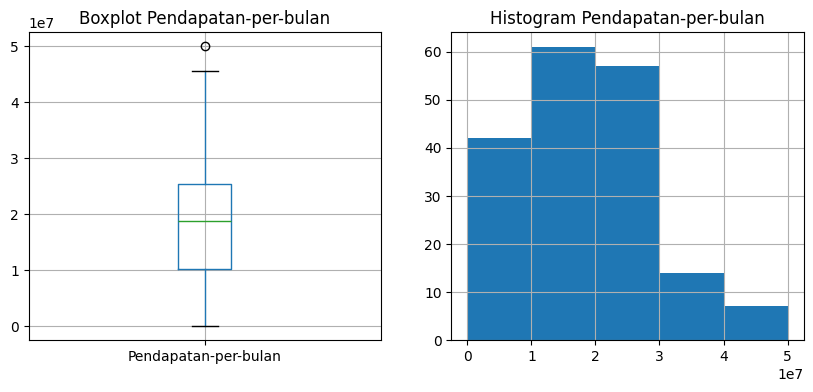

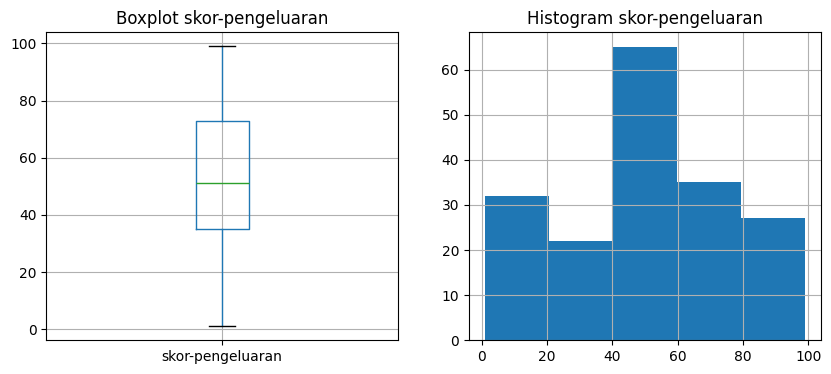

In [28]:
# DATA NUMERIK
for num in df_eda.select_dtypes(include = 'number'):
  plt.figure(figsize = (10,4))
  plt.subplot(1,2,1)
  df_eda.boxplot(column = num)
  plt.title(f'Boxplot {num}')

  plt.subplot(1,2,2)
  df_eda[num].hist(bins = 5)
  plt.title(f'Histogram {num}')
  plt.show

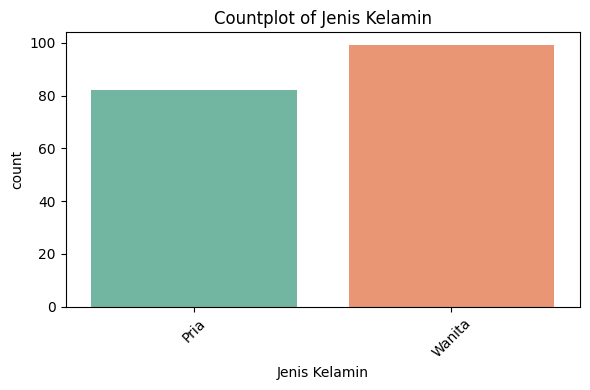

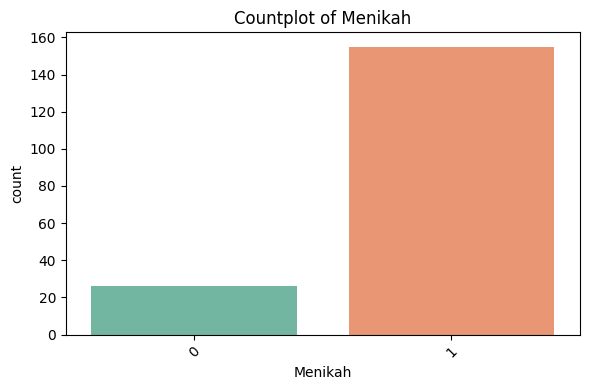

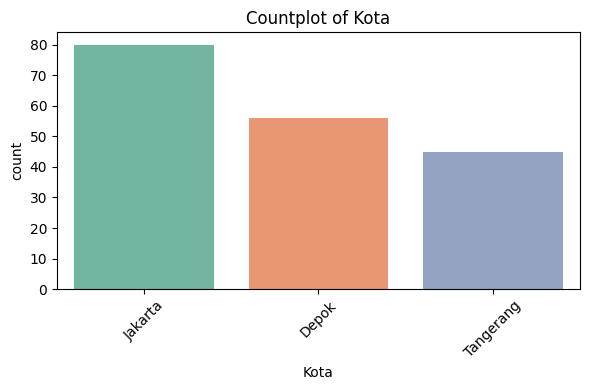

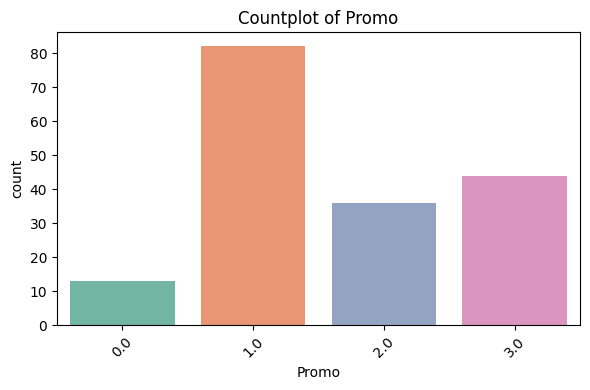

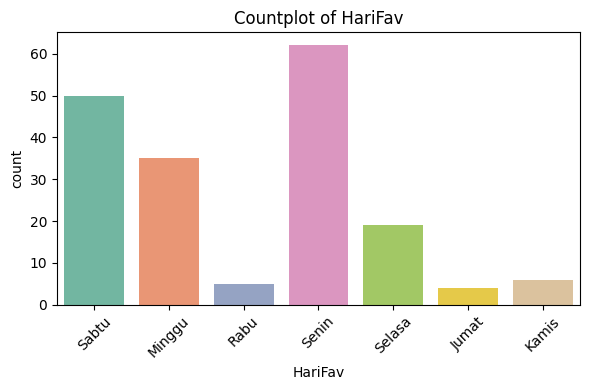

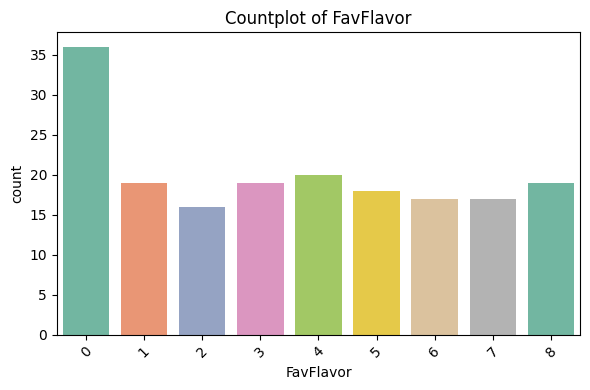

In [29]:
# DATA KATEGORIK
for cat in df_eda.select_dtypes(include = ['object', 'category']).columns:
  plt.figure(figsize=(6, 4))  # ukuran plot biar rapi
  sns.countplot(data=df_eda, x=cat, palette = 'Set2')
  plt.title(f'Countplot of {cat}')
  plt.xticks(rotation=45)  # kalau labelnya panjang
  plt.tight_layout()
  plt.show()

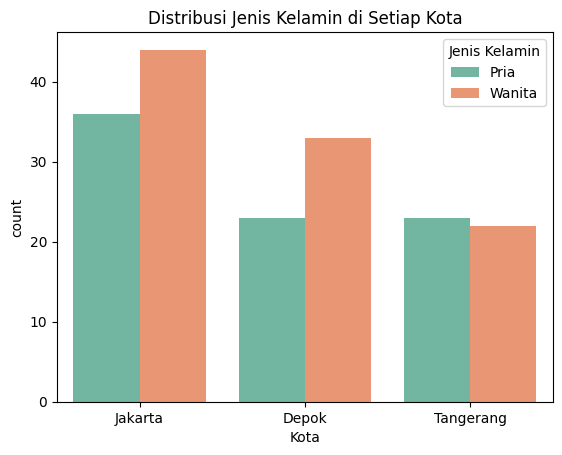

In [30]:
# Jenis Kelamin Di Tiap Kota
sns.countplot(x = 'Kota', hue = 'Jenis Kelamin', data = df_eda, palette= "Set2")
plt.title('Distribusi Jenis Kelamin di Setiap Kota')
plt.show()

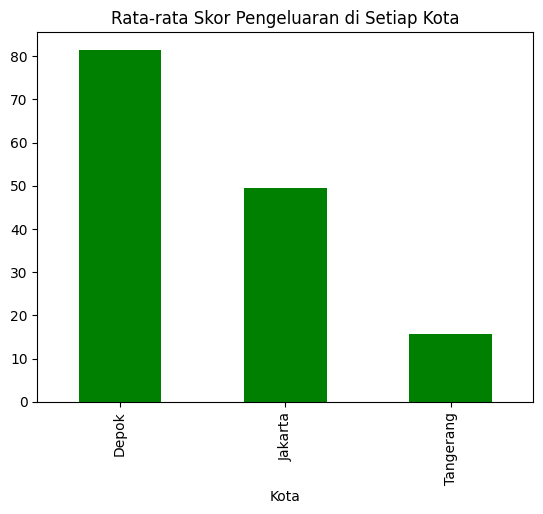

In [31]:
# Rata-Rata Skor Pengeluaran di tiap kota
df_eda.groupby('Kota')['skor-pengeluaran'].mean().plot(kind = 'bar', color = 'green')
plt.title('Rata-rata Skor Pengeluaran di Setiap Kota')
plt.show()

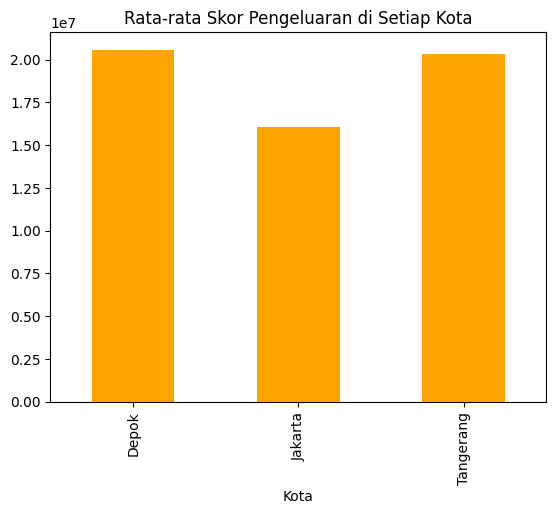

In [32]:
# Rata-Rata Skor Pengeluaran di tiap kota
df_eda.groupby('Kota')['Pendapatan-per-bulan'].mean().plot(kind = 'bar', color = 'orange')
plt.title('Rata-rata Skor Pengeluaran di Setiap Kota')
plt.show()

# Data Preparation

## Data Cluster

In [33]:
df_cluster = df_clean.copy()

In [34]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    197 non-null    int64  
 1   Jenis Kelamin         192 non-null    object 
 2   Umur                  197 non-null    int64  
 3   Pendapatan-per-bulan  197 non-null    int64  
 4   skor-pengeluaran      197 non-null    int64  
 5   Menikah               186 non-null    object 
 6   Kota                  197 non-null    object 
 7   Promo                 191 non-null    float64
 8   HariFav               197 non-null    object 
 9   FavFlavor             197 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 16.9+ KB


In [35]:
df_cluster.drop(columns = 'ID', inplace = True)

In [36]:
df_cluster.isnull().sum()

,0
Jenis Kelamin,5
Umur,0
Pendapatan-per-bulan,0
skor-pengeluaran,0
Menikah,11
Kota,0
Promo,6
HariFav,0
FavFlavor,0


In [37]:
df_cluster['Jenis Kelamin'].fillna(df_cluster['Jenis Kelamin'].mode()[0], inplace = True)
df_cluster['Menikah'].fillna(df_cluster['Menikah'].mode()[0], inplace = True)

In [38]:
df_cluster['Kota'].unique()

array(['Jakarta', 'Depok', 'Tangerang'], dtype=object)

In [39]:
df_cluster['Jenis Kelamin'] = df_cluster['Jenis Kelamin'].map({"Pria" : 0, "Wanita" : 1})
df_cluster['Kota'] = df_cluster['Kota'].map({"Depok" : 0, "Jakarta" : 1, "Tanggerang" : 2})
df_cluster['HariFav'] = df_cluster['HariFav'].map({
    "Senin" : 1,
    "Selasa" : 2,
    "Rabu" : 3,
    "Kamis" : 4,
    "Jumat" : 5,
    "Sabtu" : 6,
    "Minggu" : 7
})

In [40]:
df_cluster['Menikah'] = df_cluster['Menikah'].astype('category')
df_cluster['Jenis Kelamin'] = df_cluster['Jenis Kelamin'].astype('category')
df_cluster['Kota'] = df_cluster['Kota'].astype('category')
df_cluster['HariFav'] = df_cluster['HariFav'].astype('category')
df_cluster['FavFlavor'] = df_cluster['FavFlavor'].astype('category')
df_cluster['Promo'] = df_cluster['Promo'].astype('category')

In [41]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Jenis Kelamin         197 non-null    category
 1   Umur                  197 non-null    int64   
 2   Pendapatan-per-bulan  197 non-null    int64   
 3   skor-pengeluaran      197 non-null    int64   
 4   Menikah               197 non-null    category
 5   Kota                  145 non-null    category
 6   Promo                 191 non-null    category
 7   HariFav               197 non-null    category
 8   FavFlavor             197 non-null    category
dtypes: category(6), int64(3)
memory usage: 8.6 KB


-----Umur-----
Kuartil 1: 29.0, Kuartil 2: 36.0, Kuartil 3: 48.0
Max: 60,  Min: 18
Banyaknya Outliers: 0


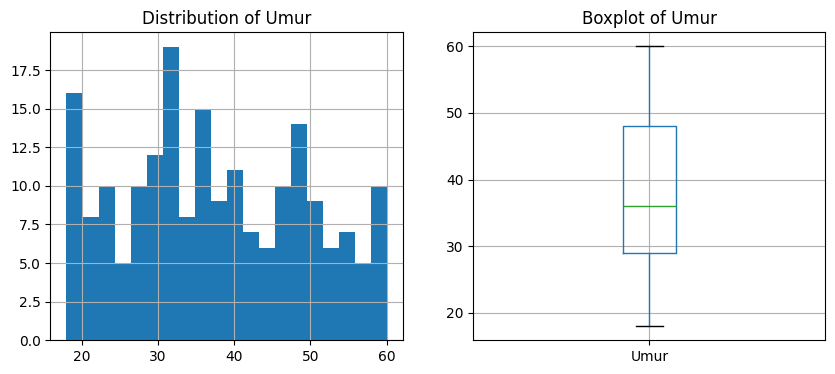

-----Pendapatan-per-bulan-----
Kuartil 1: 10245901.0, Kuartil 2: 19262295.0, Kuartil 3: 25819672.0
Max: 50000000,  Min: 0
Banyaknya Outliers: 2


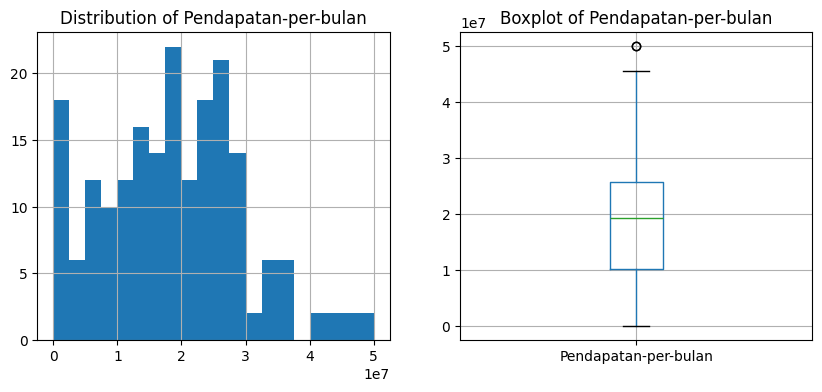

-----skor-pengeluaran-----
Kuartil 1: 35.0, Kuartil 2: 50.0, Kuartil 3: 73.0
Max: 99,  Min: 1
Banyaknya Outliers: 0


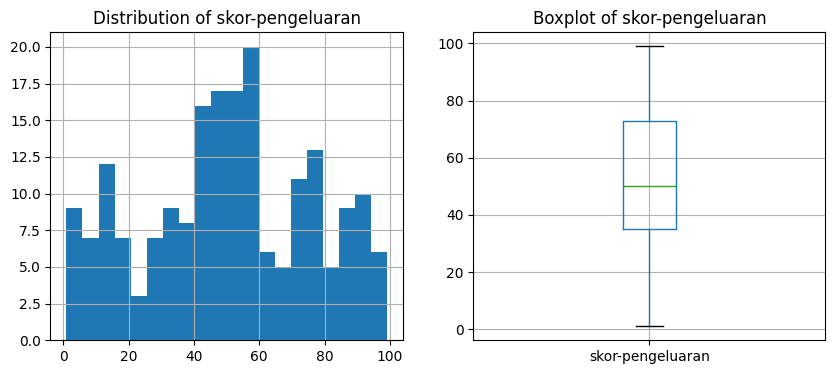

In [42]:
for col in df_cluster.select_dtypes(include = 'number'):
  print(f'-----{col}-----')
  Q1 = df_cluster[col].quantile(0.25)
  Q2 = df_cluster[col].quantile(0.5)
  Q3 = df_cluster[col].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df_cluster[(df_cluster[col] < lower_bound) | (df_cluster[col] > upper_bound)]

  print(f"Kuartil 1: {Q1}, Kuartil 2: {Q2}, Kuartil 3: {Q3}")
  print(f"Max: {df_cluster[col].max()},  Min: {df_cluster[col].min()}")
  print(f"Banyaknya Outliers: {len(outliers)}")

  # Visualisasi distribusi dengan histogram
  plt.figure(figsize = (10,4))
  plt.subplot(1,2,1)
  df_cluster[col].hist(bins = 20)
  plt.title(f'Distribution of {col}')

  # Visualisasi dengan Boxplot
  plt.subplot(1,2,2)
  df_cluster.boxplot(column = col)
  plt.title(f'Boxplot of {col}')
  plt.show()

In [43]:
# Menghapus outlier yang ada di variable "Pendapatan-per-bulan"
Q1 = df_cluster['Pendapatan-per-bulan'].quantile(0.25)
Q3 = df_cluster['Pendapatan-per-bulan'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cluster = df_cluster[(df_cluster['Pendapatan-per-bulan'] >= lower_bound) &
 (df_cluster['Pendapatan-per-bulan'] <= upper_bound)]

-----Umur-----
Kuartil 1: 28.5, Kuartil 2: 36.0, Kuartil 3: 48.0
Max: 60,  Min: 18
Banyaknya Outliers: 0


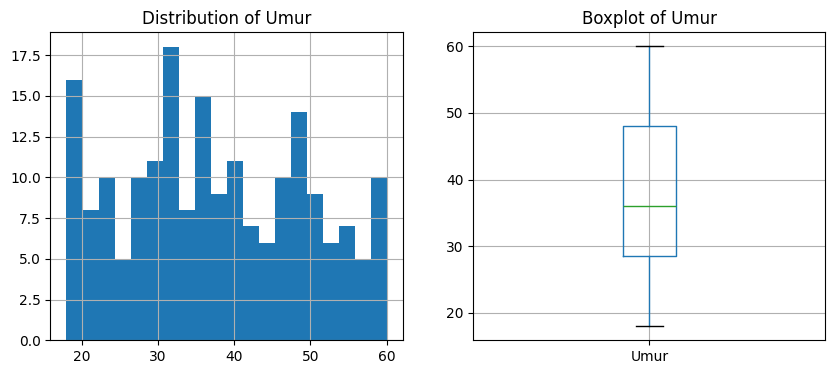

-----Pendapatan-per-bulan-----
Kuartil 1: 10245901.0, Kuartil 2: 18852459.0, Kuartil 3: 25614754.0
Max: 45491803,  Min: 0
Banyaknya Outliers: 0


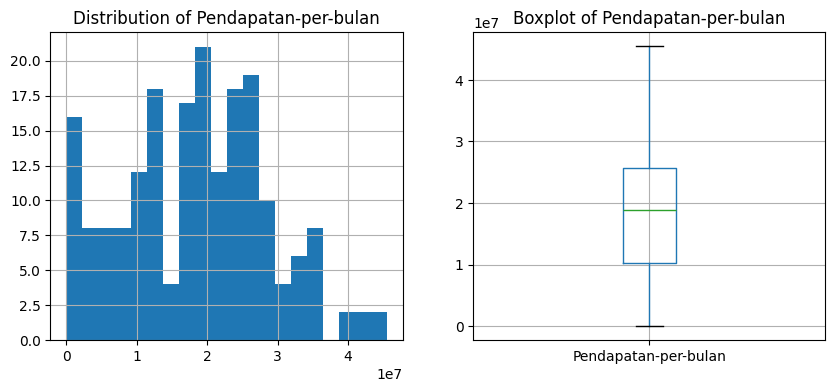

-----skor-pengeluaran-----
Kuartil 1: 35.0, Kuartil 2: 50.0, Kuartil 3: 73.0
Max: 99,  Min: 1
Banyaknya Outliers: 0


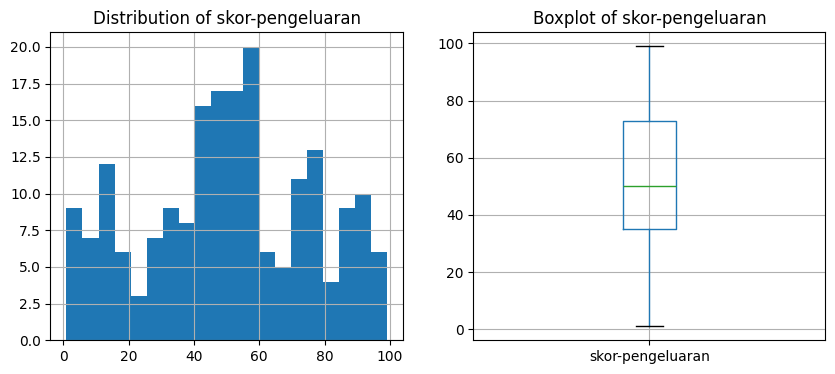

In [44]:
# Menampilkan data yang sudah tidak ada outliernya
for col in df_cluster.select_dtypes(include = 'number'):
  print(f'-----{col}-----')
  Q1 = df_cluster[col].quantile(0.25)
  Q2 = df_cluster[col].quantile(0.5)
  Q3 = df_cluster[col].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df_cluster[(df_cluster[col] < lower_bound) | (df_cluster[col] > upper_bound)]

  print(f"Kuartil 1: {Q1}, Kuartil 2: {Q2}, Kuartil 3: {Q3}")
  print(f"Max: {df_cluster[col].max()},  Min: {df_cluster[col].min()}")
  print(f"Banyaknya Outliers: {len(outliers)}")

  # Visualisasi distribusi dengan histogram
  plt.figure(figsize = (10,4))
  plt.subplot(1,2,1)
  df_cluster[col].hist(bins = 20)
  plt.title(f'Distribution of {col}')

  # Visualisasi dengan Boxplot
  plt.subplot(1,2,2)
  df_cluster.boxplot(column = col)
  plt.title(f'Boxplot of {col}')
  plt.show()

In [45]:
# Melakukan Normalisasi/Standarisasi
from sklearn.preprocessing import StandardScaler

# Membuat objek scaler
scaler = StandardScaler()

# Variable yang akan dinormalisasi
cols = ['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran']

# Menormalisasi data
df_scaled = df_cluster.copy()
df_scaled[cols] = scaler.fit_transform(df_cluster[cols])

print(df_scaled[cols])

         Umur  Pendapatan-per-bulan  skor-pengeluaran
0    0.973183             -0.501230          0.061472
1   -0.467684              1.472514          1.380443
2    1.142696             -0.224906         -0.365253
3   -1.569523             -0.540704          0.177852
4    0.040857              0.169843         -0.326460
..        ...                   ...               ...
195 -0.552441             -1.369677          0.876131
196  1.651238             -0.224906          0.022679
197 -0.213413              2.380436          1.108890
198 -1.230496             -1.646001          1.690789
199  1.057940             -1.606526         -1.412671

[195 rows x 3 columns]


## Data Market Basket Analysis (MBA)

In [46]:
df_mba = df_clean.copy()

In [47]:
df_mba['Menikah'] = df_mba['Menikah'].replace({1: 'Menikah', 0: 'Belum Menikah'})
df_mba['Promo'] = df_mba['Promo'].replace({1.0: 'Dapat Promo', 0.0: 'Tidak Promo'}) # Corrected to use float keys for replace

# 3. Ubah semua kolom numerik menjadi kategori (diskretisasi)
for col in ['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran']:
    try:
        df_mba[col] = pd.qcut(df_mba[col], q=4, labels=['Low', 'Mid', 'High', 'Very High'], duplicates='drop')
    except:
        df_mba[col] = pd.cut(df_mba[col], bins=3, labels=['Low', 'Mid', 'High'], duplicates='drop')

#  Pastikan kolom non-numerik dikonversi ke string (kategori)
for col in df_mba.select_dtypes(include=['object', 'category']).columns: # Include category dtype
    df_mba[col] = df_mba[col].astype(str)

print("Semua variabel sudah diubah menjadi kategori.")
display(df_mba.head())
df_mba.info()

Semua variabel sudah diubah menjadi kategori.


,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,Very High,Mid,High,1,Jakarta,Dapat Promo,Sabtu,2
1,102,Wanita,Mid,Very High,Very High,1,Depok,Dapat Promo,Minggu,6
2,103,Pria,Very High,Mid,Mid,1,Jakarta,2.0,Minggu,3
3,104,Pria,Low,Mid,High,0,Jakarta,Dapat Promo,Rabu,7
4,105,Wanita,High,High,Mid,1,Jakarta,2.0,Senin,8


<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    197 non-null    int64 
 1   Jenis Kelamin         197 non-null    object
 2   Umur                  197 non-null    object
 3   Pendapatan-per-bulan  197 non-null    object
 4   skor-pengeluaran      197 non-null    object
 5   Menikah               197 non-null    object
 6   Kota                  197 non-null    object
 7   Promo                 197 non-null    object
 8   HariFav               197 non-null    object
 9   FavFlavor             197 non-null    int64 
dtypes: int64(2), object(8)
memory usage: 16.9+ KB


# MODELING

## Clustering

In [48]:
X = df_scaled[['skor-pengeluaran', 'Pendapatan-per-bulan', 'Umur']]
random_state = 80

In [49]:
X.head()

,skor-pengeluaran,Pendapatan-per-bulan,Umur
0,0.061472,-0.501230,0.973183
1,1.380443,1.472514,-0.467684
2,-0.365253,-0.224906,1.142696
3,0.177852,-0.540704,-1.569523
4,-0.326460,0.169843,0.040857


Text(0.5, 1.0, 'Elbow curve')

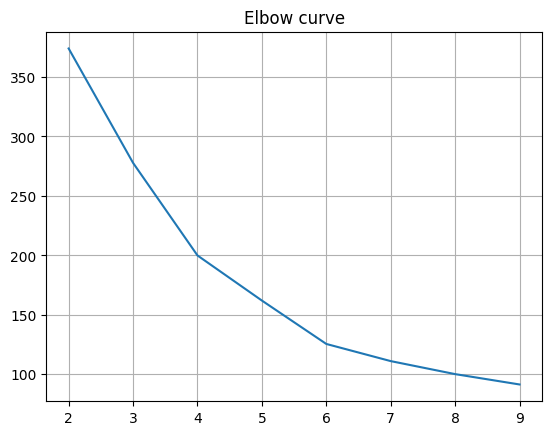

In [50]:
X = df_scaled[['Umur', 'skor-pengeluaran', 'Pendapatan-per-bulan']]
distorsions, k1, kN = [], 2, 10
for k in range(k1, kN):
    kmeans = cluster.KMeans(n_clusters=k, random_state = 80, n_init=20).fit(X)
    distorsions.append(kmeans.inertia_)

plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

array([0, 1, 0, 2, 0, 1, 2, 2, 2, 2], dtype=int32)

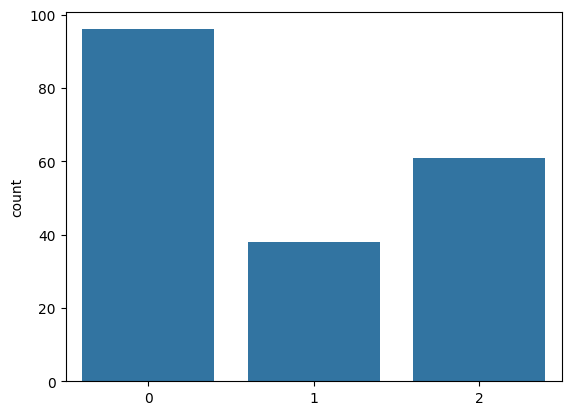

In [51]:
 # Mengecek K = 3
k=3
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', random_state = random_state)
kmPP.fit(X)
C_kmpp = kmPP.predict(X)

sns.countplot(x=C_kmpp)
C_kmpp[:10]

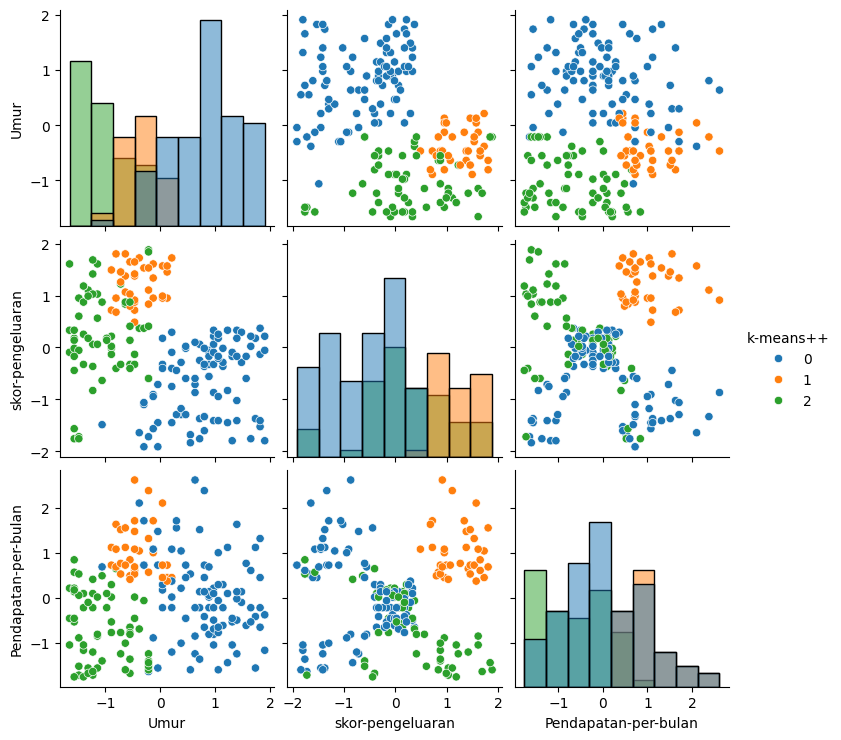

In [52]:
df_scaled['k-means++'] = C_kmpp
g = sns.pairplot(df_scaled[['Umur','skor-pengeluaran','Pendapatan-per-bulan','k-means++']], \
                 hue="k-means++", diag_kind="hist", palette="tab10")

In [53]:
# Evaluasi K = 3
km = cluster.KMeans(n_clusters = 3, init = 'random', max_iter = 300, tol = 0.0001, random_state = random_state)
km.fit(X)
km.inertia_

277.79434150446264

array([0, 1, 0, 2, 0, 1, 2, 2, 2, 2], dtype=int32)

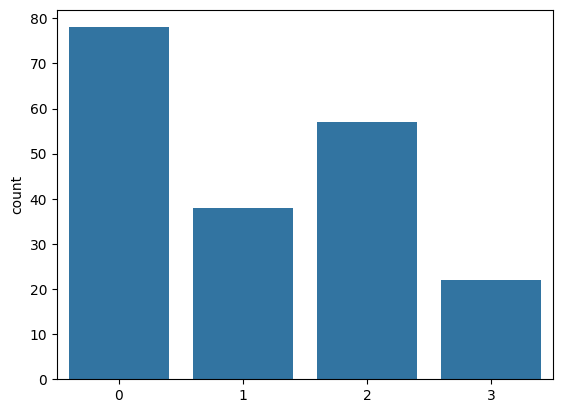

In [54]:
# Mengecek K = 4
k=4
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', random_state = random_state)
kmPP.fit(X)
C_kmpp = kmPP.predict(X)

sns.countplot(x=C_kmpp)
C_kmpp[:10]

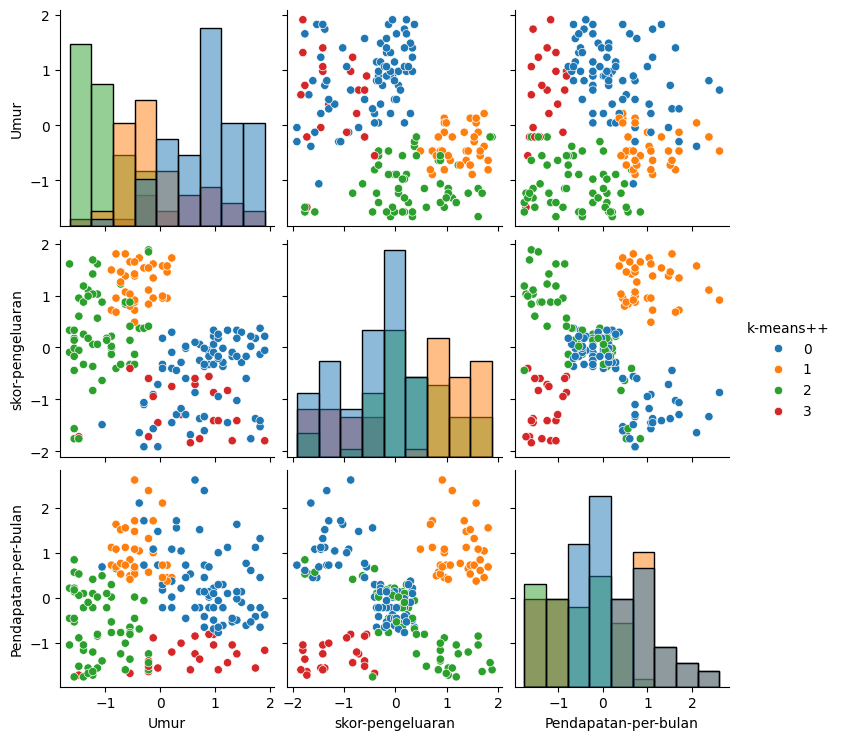

In [55]:
df_scaled['k-means++'] = C_kmpp
g = sns.pairplot(df_scaled[['Umur','skor-pengeluaran','Pendapatan-per-bulan','k-means++']], \
                 hue="k-means++", diag_kind="hist", palette="tab10")

In [56]:
# Evaluasi K = 4
km = cluster.KMeans(n_clusters = k, init = 'random', max_iter = 300, tol = 0.0001, random_state = random_state)
km.fit(X)
km.inertia_

199.95585122573

array([0, 1, 0, 2, 0, 1, 2, 4, 2, 2], dtype=int32)

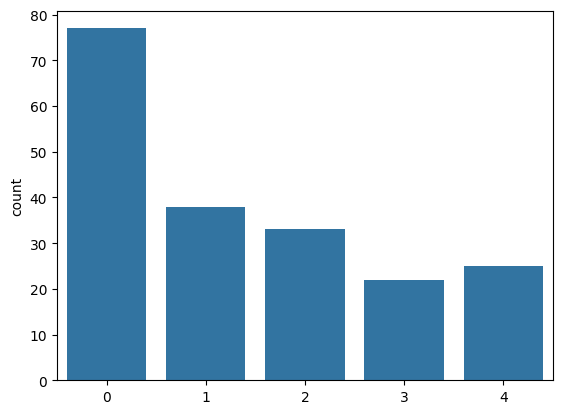

In [57]:
# Mengecek K = 5
k=5
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', random_state = random_state)
kmPP.fit(X)
C_kmpp = kmPP.predict(X)

sns.countplot(x=C_kmpp)
C_kmpp[:10]

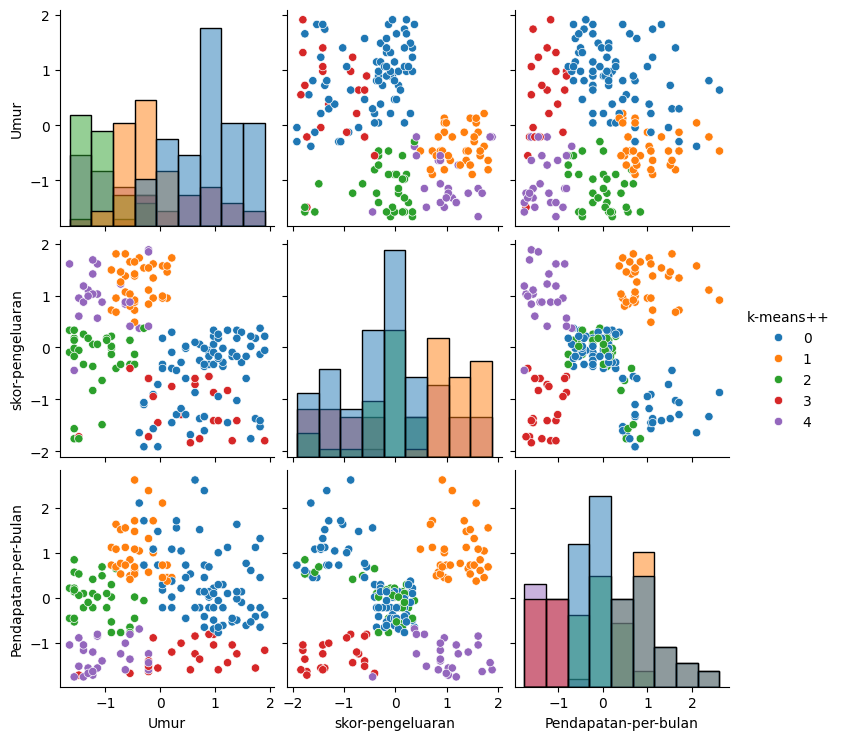

In [58]:
df_scaled['k-means++'] = C_kmpp
g = sns.pairplot(df_scaled[['Umur','skor-pengeluaran','Pendapatan-per-bulan','k-means++']], \
                 hue="k-means++", diag_kind="hist", palette="tab10")

In [59]:
# Evaluasi K = 5
km = cluster.KMeans(n_clusters = k, init = 'random', max_iter = 300, tol = 0.0001, random_state = random_state)
km.fit(X)
km.inertia_

162.0380804973795

array([0, 1, 0, 2, 0, 1, 2, 4, 2, 2], dtype=int32)

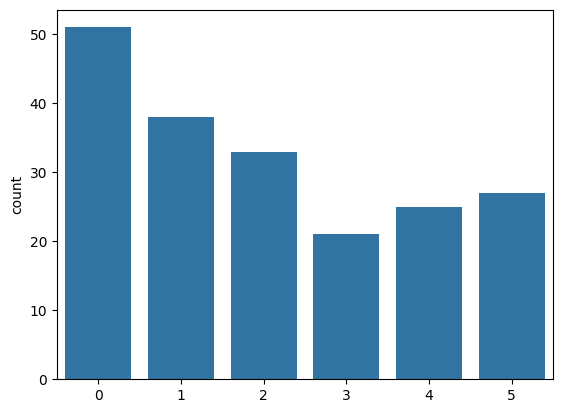

In [60]:
# Mengecek K = 6
k=6
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', random_state = random_state)
kmPP.fit(X)
C_kmpp = kmPP.predict(X)

sns.countplot(x=C_kmpp)
C_kmpp[:10]

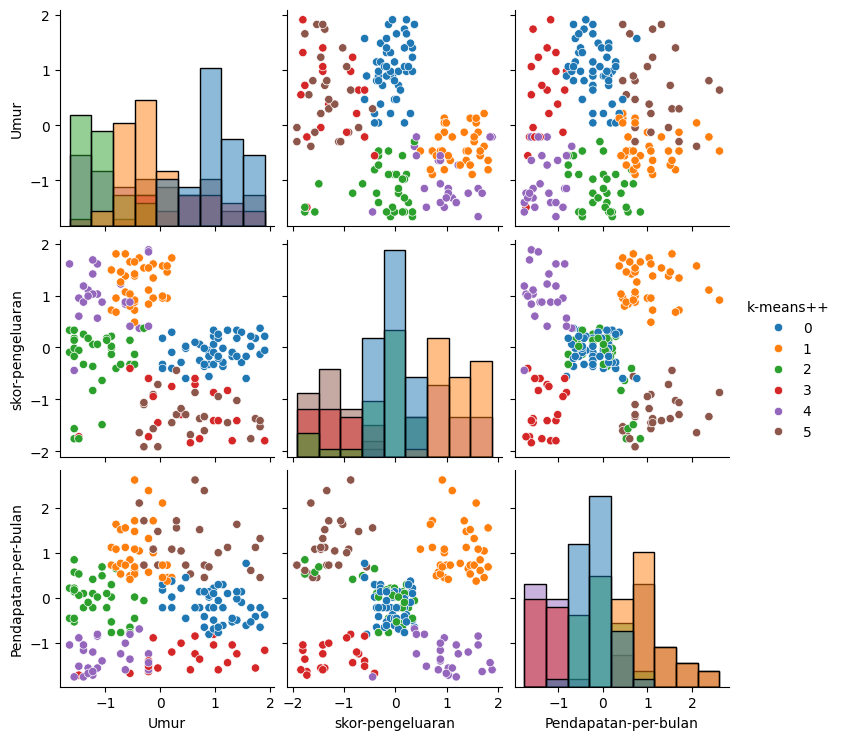

In [61]:
df_scaled['k-means++'] = C_kmpp
g = sns.pairplot(df_scaled[['Umur','skor-pengeluaran','Pendapatan-per-bulan','k-means++']], \
                 hue="k-means++", diag_kind="hist", palette="tab10")

In [62]:
# Evaluasi K = 6
km = cluster.KMeans(n_clusters = k, init = 'random', max_iter = 300, tol = 0.0001, random_state = random_state)
km.fit(X)
km.inertia_

125.56637980623512

array([0, 1, 0, 2, 0, 1, 2, 4, 2, 2], dtype=int32)

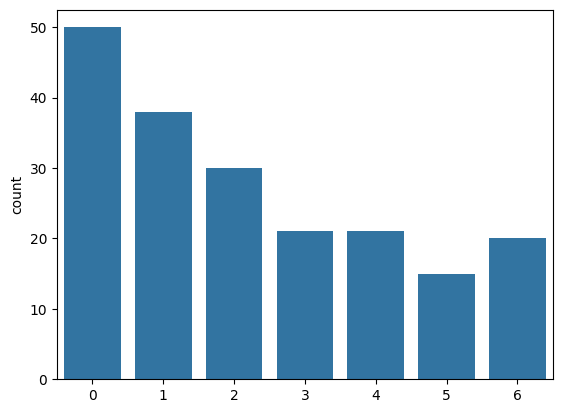

In [63]:
# Mengecek K = 7
k=7
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', random_state = random_state)
kmPP.fit(X)
C_kmpp = kmPP.predict(X)

sns.countplot(x=C_kmpp)
C_kmpp[:10]

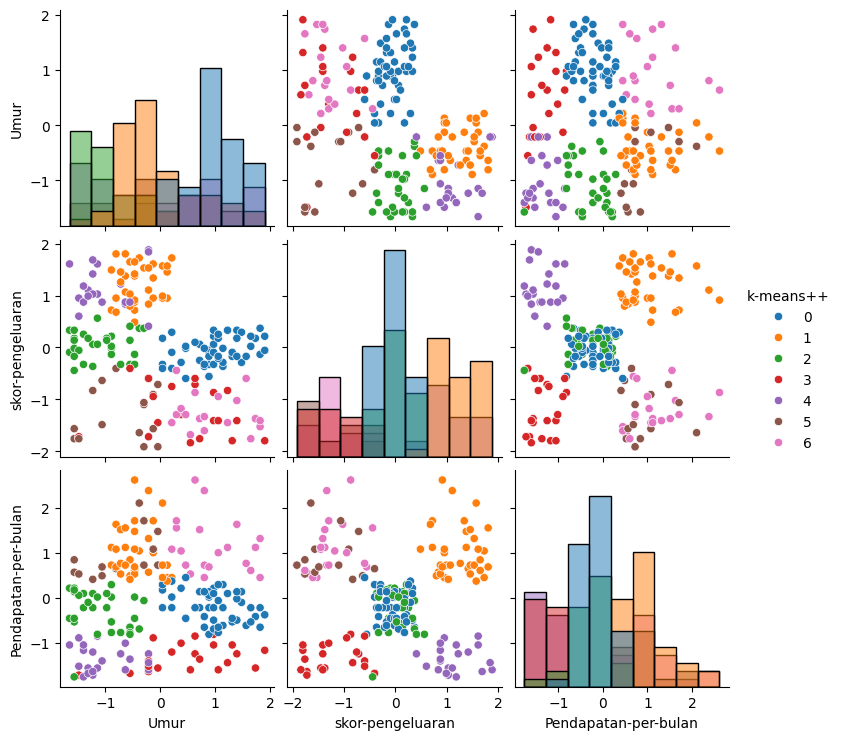

In [64]:
df_scaled['k-means++'] = C_kmpp
g = sns.pairplot(df_scaled[['Umur','skor-pengeluaran','Pendapatan-per-bulan','k-means++']], \
                 hue="k-means++", diag_kind="hist", palette="tab10")

In [65]:
# Evaluasi K = 7
km = cluster.KMeans(n_clusters = k, init = 'random', max_iter = 300, tol = 0.0001, random_state = random_state)
km.fit(X)
km.inertia_

111.22686589624927

In [66]:
from sklearn.metrics import silhouette_score

for k in range(3, 8):
    kmeans = KMeans(n_clusters=k, random_state=99)
    labels = kmeans.fit_predict(X)
    sil = silhouette_score(X, labels)
    print(f"K={k}, Silhouette={sil:.3f}")

K=3, Silhouette=0.307
K=4, Silhouette=0.322
K=5, Silhouette=0.381
K=6, Silhouette=0.355
K=7, Silhouette=0.433


In [67]:
# Menambahkan cluster ke data
kmeans = KMeans(n_clusters = 5, random_state = 99)
df_cluster['cluster'] = kmeans.fit_predict(X)

In [68]:
df_cluster

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor,cluster
0,1,49,13114754,52,1,1.0,1.0,6,2,0
1,1,32,33606557,86,1,0.0,1.0,7,6,4
2,0,51,15983606,41,1,1.0,2.0,7,3,0
3,0,19,12704918,55,0,1.0,1.0,3,7,1
4,1,38,20081967,42,1,1.0,2.0,1,8,0
...,...,...,...,...,...,...,...,...,...,...
195,0,31,4098360,73,1,0.0,1.0,1,0,3
196,0,57,15983606,51,1,1.0,1.0,7,5,0
197,1,35,43032786,79,1,0.0,1.0,1,7,4
198,1,23,1229508,94,1,0.0,0.0,2,0,3


In [69]:
df_cluster['cluster'].value_counts()

,count
cluster,
0,77
4,38
1,33
3,25
2,22


In [70]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Jenis Kelamin         195 non-null    category
 1   Umur                  195 non-null    int64   
 2   Pendapatan-per-bulan  195 non-null    int64   
 3   skor-pengeluaran      195 non-null    int64   
 4   Menikah               195 non-null    category
 5   Kota                  144 non-null    category
 6   Promo                 189 non-null    category
 7   HariFav               195 non-null    category
 8   FavFlavor             195 non-null    category
 9   cluster               195 non-null    int32   
dtypes: category(6), int32(1), int64(3)
memory usage: 9.3 KB


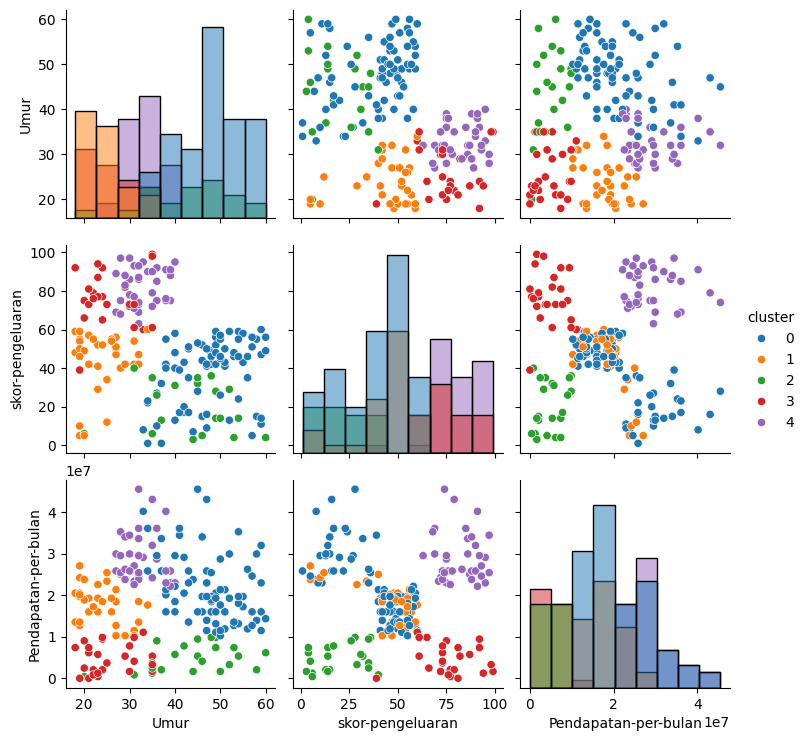

In [71]:
sns.pairplot(df_cluster[['Umur','skor-pengeluaran','Pendapatan-per-bulan','cluster']], \
                 hue="cluster", diag_kind="hist", palette="tab10")

In [72]:
df_cluster.drop(columns=df_cluster.select_dtypes(include = 'category'), inplace = True)

In [73]:
df_cluster.groupby('cluster').mean()

,Umur,Pendapatan-per-bulan,skor-pengeluaran
cluster,,,
0,47.727273,2.153502e+07,37.779221
1,24.030303,1.807004e+07,44.060606
2,43.818182,4.843517e+06,20.090909
3,25.560000,4.704918e+06,76.240000
4,32.763158,2.877481e+07,82.105263


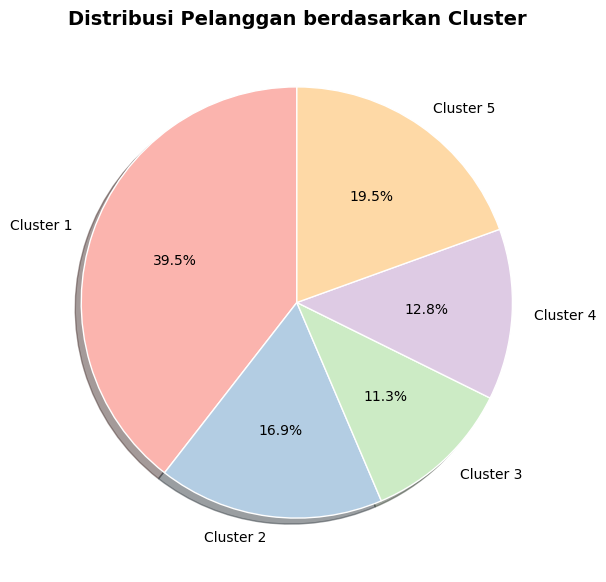

In [74]:
cluster_counts = df_cluster['cluster'].value_counts().sort_index()
labels = [f'Cluster {i+1}' for i in range(len(cluster_counts))]
colors = plt.cm.Pastel1(range(len(cluster_counts)))

plt.figure(figsize=(7, 7))
plt.pie(cluster_counts,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        shadow=True,
        wedgeprops={'edgecolor': 'white'})

plt.title('Distribusi Pelanggan berdasarkan Cluster', fontsize=14, fontweight='bold')
plt.show()


**Cluster 0:**

Insight:
- Merupakan individu mapan yang stabil secara finansial, dimana cenderung memilih untuk berorientsasi pada kebutuhan. contohnya: menabung, investasi, dan pengeluaran yang terencana
- Cluster ini didominasi oleh individu berusia yang cenderung menjaga kesehatan seperti membatasi konsumsi gula dan garam.
- Cluster ini terdiri dari individu yang menyukai produk premium dengan harga yang masih masuk akal. Mereka cenderung tidak tertarik pada promo sesaat, tetapi lebih menyukai penawaran bernilai seperti paket hemat yang tetap terasa eksklusif serta program loyalitas yang dapat dinikmati dalam jangka panjang.

Rekomendasi:
- Menyediakan produk dengan bahan yang rendah gula, rendah lemak, dan organik, seperti es krim plant-based
- Mengadakan diskon kecil dengan jangka waktu yang panjang untuk menjaga minat beli secara berkelanjutan
- Menerapkan program loyalitas pelanggan, misalnya setiap pembelian mendapatkan poin yang dapat ditukar dengan layanan pemeriksaan kesehatan gratis atau hadiah menarik lainnya.


**Cluster 1:**

Insight:
- Individu muda yang baru mapan secara ekonomi dengan pola pengeluaran yang cukup terkontrol (tidak terlalu konsumtif)
- Merupakan cluster yang berpotensi menjadi pelanggan loyal di masa depan
- Merupakan cluster yang masuk kedalam kategori affordable premium (konsumen yang mencari kualitas premium dengan harga yang masih terjangkau)

Rekomendasi:
- Menghadirkan produk yang berkolaborasi dengan merek yang besar dan ekslusif
- Memberikan


**Cluster 2:**

Insight:
- Cluster dengan usia yang relatif tua dengan daya beli yang terbatas, dimana cenderung hemat dan fokus pada kebutuhan dasar (Mementingkan tanggungan keluarga dan tekanan ekonomi lainnya)
- Merupakan culster dengan pengeluaran paling rendah

Rekomendasi:
- Menyediakan paket bundling/paket hemat
- Memberikan poin pada setiap transaksi pembelian, yang dapat ditukarkan dengan paket gratis setelah mencapai jumlah poin tertentu


**Cluster 3:**

Insight:
- Merupakan anak muda yang berpendapatan rendah dengan pengeluaran yang tinggi. Ini merupakan contoh anak muda yang bergaya hidup hedon dan FOMO (Fear Of Missing Out) atau suka mengikuti tren
- Cluster yang sangat responsif terhadap promosi dan cocok dijadikan target utama untuk aktivitas penjualan jangka pendek

Rekomendasi:
- Memberikan promo buy 1 get 1, limited edition, atau flash sale
- Menghadirkan produk dengan merek yang tengah naik daun
- Mengadakan challenge, seperti “Ikuti challenge seru: foto es krim favoritmu, edit sekreatif mungkin, dan menangkan hadiah spesial untuk karya paling unik!”
- Mengembangkan inovasi produk es krim dengan konsep unik, seperti es krim berbentuk mie, es krim dengan campuran buah dan sayur, serta es krim yang dibentuk menyerupai karakter kartun lucu.


**Cluster 4:**

Insight:
- Merupakan cluster dengan pendapatan tertinggi yang menjadikannya prioritas utama untuk program loyalti atau exclusive membership
- Cocok utnuk cross-selling produk premium
- Cenderung membeli karena kualitas, bukan harga
- Meningkatkan pengalaman pelanggan (customer experience) sangat penting untuk mempertahankan mereka

Rekomendasi:
- Memberikan hadiah spesial kepada pelanggan pada momen-momen tertentu, seperti hari ulang tahun, hari kemerdekaan, atau pergantian tahun.
- Menyediakan undangan personal bagi pelanggan untuk mencicipi produk edisi terbatas atau varian yang belum resmi diluncurkan
- Memberikan perlakuan eksklusif saat melakukan pemesanan, termasuk akses ke jalur prioritas atau layanan pemesanan pribadi
- Memberikan kesempatan bagi pelanggan terpilih untuk berpartisipasi dalam proses perancangan varian rasa baru yang akan datang

## Market Basket Analysis

In [75]:
df_mba = df_clean.copy()

In [76]:
df_mba.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    197 non-null    int64  
 1   Jenis Kelamin         192 non-null    object 
 2   Umur                  197 non-null    int64  
 3   Pendapatan-per-bulan  197 non-null    int64  
 4   skor-pengeluaran      197 non-null    int64  
 5   Menikah               186 non-null    object 
 6   Kota                  197 non-null    object 
 7   Promo                 191 non-null    float64
 8   HariFav               197 non-null    object 
 9   FavFlavor             197 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 16.9+ KB


In [77]:
# Cek unique value tiap kolom (urut + tampilkan NaN kalau ada)
for i in df_clean.columns:
    print(f'----- {i} -----')
    uniq_vals = df_clean[i].unique()
    try:
        uniq_sorted = sorted([x for x in uniq_vals if pd.notna(x)])
        if df_clean[i].isna().sum() > 0:
            uniq_sorted.append(np.nan)
        print(uniq_sorted)
    except:
        print(uniq_vals)
    print()

----- ID -----
[np.int64(101), np.int64(102), np.int64(103), np.int64(104), np.int64(105), np.int64(106), np.int64(107), np.int64(108), np.int64(109), np.int64(110), np.int64(111), np.int64(112), np.int64(113), np.int64(114), np.int64(115), np.int64(116), np.int64(117), np.int64(118), np.int64(119), np.int64(120), np.int64(121), np.int64(122), np.int64(123), np.int64(124), np.int64(125), np.int64(126), np.int64(127), np.int64(128), np.int64(129), np.int64(130), np.int64(131), np.int64(132), np.int64(133), np.int64(134), np.int64(135), np.int64(136), np.int64(137), np.int64(138), np.int64(139), np.int64(140), np.int64(141), np.int64(142), np.int64(143), np.int64(144), np.int64(145), np.int64(146), np.int64(147), np.int64(148), np.int64(149), np.int64(150), np.int64(151), np.int64(152), np.int64(153), np.int64(154), np.int64(155), np.int64(156), np.int64(157), np.int64(158), np.int64(159), np.int64(160), np.int64(161), np.int64(162), np.int64(163), np.int64(164), np.int64(165), np.int64(

In [78]:
# Penanganan Missing Value 'Jenis Kelamin'
df_mba['Jenis Kelamin'].fillna('Tidak diketahui', inplace=True)
print(df_mba['Jenis Kelamin'].value_counts())

Jenis Kelamin
Wanita             107
Pria                85
Tidak diketahui      5
Name: count, dtype: int64


In [79]:
# Kategori Umur
bins_umur = [0, 25, 45, 65]
labels_umur = ['Remaja', 'Dewasa', 'Paruh Baya']
df_mba['Umur'] = pd.cut(df_mba['Umur'], bins=bins_umur, labels=labels_umur)
print(df_mba['Umur'].value_counts(dropna=False))

Umur
Dewasa        99
Paruh Baya    61
Remaja        37
Name: count, dtype: int64


In [80]:
# Kategori Pendapatan Per Bulan
bins_pendapatan = [0, 10000000, 25000000, 40000000, 60000000]
labels_pendapatan = ['Rendah', 'Menengah', 'Tinggi', 'Sangat Tinggi']
df_mba['Pendapatan-per-bulan'] = pd.cut(df_mba['Pendapatan-per-bulan'], bins=bins_pendapatan, labels=labels_pendapatan, include_lowest=True)
print(df_mba['Pendapatan-per-bulan'].value_counts(dropna=False))

Pendapatan-per-bulan
Menengah         96
Tinggi           47
Rendah           46
Sangat Tinggi     8
Name: count, dtype: int64


In [81]:
# Kategori Skor-Pengeluaran
bins_skor_pengeluaran = [0, 35, 70, 100]   # 0–35 Pengeluaran_Rendah, 36–70 Pengeluaran_Sedang, 71–100 Pengeluaran_Tinggi
labels_skor_pengeluaran = ['Pengeluaran_Rendah', 'Pengeluaran_Sedang', 'Pengeluaran_Tinggi']
df_mba['skor-pengeluaran'] = pd.cut(df_mba['skor-pengeluaran'], bins=bins_skor_pengeluaran, labels=labels_skor_pengeluaran, include_lowest=True)
print(df_mba['skor-pengeluaran'].value_counts(dropna=False))

skor-pengeluaran
Pengeluaran_Sedang    89
Pengeluaran_Rendah    54
Pengeluaran_Tinggi    54
Name: count, dtype: int64


In [82]:
# Kategori Menikah dan Penanganan Missing Value
df_mba['Menikah'] = df_mba['Menikah'].replace({
    '1': 'Menikah',
    '0': 'Belum Menikah',
    'nan': 'Tidak Diketahui',
})
df_mba['Menikah'].fillna('Tidak Diketahui', inplace=True)
print(df_mba['Menikah'].value_counts(dropna=False))

Menikah
Menikah            159
Belum Menikah       27
Tidak Diketahui     11
Name: count, dtype: int64


In [83]:
# Kategori Promo dan Penanganan Missing Value
df_mba['Promo'] = df_clean['Promo'].astype(float).astype('Int64')
df_mba['Promo'] = df_mba['Promo'].map({
    0: 'Tidak Pernah',
    1: 'Jarang',
    2: 'Sedang',
    3: 'Sering'
}).fillna('Tidak Diketahui')
print(df_mba['Promo'].value_counts(dropna=False))
print()

Promo
Jarang             86
Sering             50
Sedang             41
Tidak Pernah       14
Tidak Diketahui     6
Name: count, dtype: int64



In [84]:
# Kategori Rasa Favorit (Fav Flavor)
df_mba['FavFlavor'] = df_clean['FavFlavor'].map({
    0: 'Vanilla',
    1: 'Strawberry',
    2: 'Cokelat',
    3: 'BlueBerry',
    4: 'BubbleGum/Cotton Candy',
    5: 'Coconut',
    6: 'Caramel Pecan',
    7: 'Mix 2 Flavors',
    8: 'Mix 3 Flavors'
})
print(df_mba['FavFlavor'].value_counts(dropna=False))
print()

FavFlavor
Vanilla                   39
Cokelat                   20
Caramel Pecan             20
Coconut                   20
BlueBerry                 20
BubbleGum/Cotton Candy    20
Strawberry                20
Mix 3 Flavors             19
Mix 2 Flavors             19
Name: count, dtype: int64



In [85]:
# Ubah tipe data kolom kategorikal ke category
df_mba['Jenis Kelamin'] = df_mba['Jenis Kelamin'].astype('category')
df_mba['Umur'] = df_mba['Umur'].astype('category')
df_mba['Pendapatan-per-bulan'] = df_mba['Pendapatan-per-bulan'].astype('category')
df_mba['skor-pengeluaran'] = df_mba['skor-pengeluaran'].astype('category')
df_mba['Menikah'] = df_mba['Menikah'].astype('category')
df_mba['Kota'] = df_mba['Kota'].astype('category')
df_mba['Promo'] = df_mba['Promo'].astype('category')
df_mba['HariFav'] = df_mba['HariFav'].astype('category')
df_mba['FavFlavor'] = df_mba['FavFlavor'].astype('category')
# Cek hasil perubahan tipe data
df_mba.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID                    197 non-null    int64   
 1   Jenis Kelamin         197 non-null    category
 2   Umur                  197 non-null    category
 3   Pendapatan-per-bulan  197 non-null    category
 4   skor-pengeluaran      197 non-null    category
 5   Menikah               197 non-null    category
 6   Kota                  197 non-null    category
 7   Promo                 197 non-null    category
 8   HariFav               197 non-null    category
 9   FavFlavor             197 non-null    category
dtypes: category(9), int64(1)
memory usage: 6.6 KB


In [86]:
# Cek Data Setelah Diubah dalam Kelompok Kategori
df_mba

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,Paruh Baya,Menengah,Pengeluaran_Sedang,Menikah,Jakarta,Jarang,Sabtu,Cokelat
1,102,Wanita,Dewasa,Tinggi,Pengeluaran_Tinggi,Menikah,Depok,Jarang,Minggu,Caramel Pecan
2,103,Pria,Paruh Baya,Menengah,Pengeluaran_Sedang,Menikah,Jakarta,Sedang,Minggu,BlueBerry
3,104,Pria,Remaja,Menengah,Pengeluaran_Sedang,Belum Menikah,Jakarta,Jarang,Rabu,Mix 2 Flavors
4,105,Wanita,Dewasa,Menengah,Pengeluaran_Sedang,Menikah,Jakarta,Sedang,Senin,Mix 3 Flavors
...,...,...,...,...,...,...,...,...,...,...
195,296,Pria,Dewasa,Rendah,Pengeluaran_Tinggi,Menikah,Depok,Jarang,Senin,Vanilla
196,297,Pria,Paruh Baya,Menengah,Pengeluaran_Sedang,Menikah,Jakarta,Jarang,Minggu,Coconut
197,298,Wanita,Dewasa,Sangat Tinggi,Pengeluaran_Tinggi,Menikah,Depok,Jarang,Senin,Mix 2 Flavors
198,299,Wanita,Remaja,Rendah,Pengeluaran_Tinggi,Menikah,Depok,Tidak Pernah,Selasa,Vanilla


### FITURE SELECTION MBA

In [87]:
# Hilangkan semua warning (termasuk DeprecationWarning dari Jupyter)
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")

In [88]:
# Buat kolom gabungan (list of items)
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [89]:
# Pilih kolom kategori yang relevan untuk MBA
kolom_mba = [
    'Jenis Kelamin',
    'Umur',
    'Pendapatan-per-bulan',
    'skor-pengeluaran',
    'Menikah',
    'Kota',
    'Promo',
    'HariFav',
    'FavFlavor'
]

# Ubah setiap baris jadi list berisi kombinasi kategorinya
transactions = df_mba[kolom_mba].astype(str).values.tolist()

# Cek contoh (10 baris pertama)
for t in transactions[:10]:
    print(t)


['Wanita', 'Paruh Baya', 'Menengah', 'Pengeluaran_Sedang', 'Menikah', 'Jakarta', 'Jarang', 'Sabtu', 'Cokelat']
['Wanita', 'Dewasa', 'Tinggi', 'Pengeluaran_Tinggi', 'Menikah', 'Depok', 'Jarang', 'Minggu', 'Caramel Pecan']
['Pria', 'Paruh Baya', 'Menengah', 'Pengeluaran_Sedang', 'Menikah', 'Jakarta', 'Sedang', 'Minggu', 'BlueBerry']
['Pria', 'Remaja', 'Menengah', 'Pengeluaran_Sedang', 'Belum Menikah', 'Jakarta', 'Jarang', 'Rabu', 'Mix 2 Flavors']
['Wanita', 'Dewasa', 'Menengah', 'Pengeluaran_Sedang', 'Menikah', 'Jakarta', 'Sedang', 'Senin', 'Mix 3 Flavors']
['Wanita', 'Dewasa', 'Tinggi', 'Pengeluaran_Tinggi', 'Menikah', 'Depok', 'Tidak Pernah', 'Senin', 'Vanilla']
['Pria', 'Dewasa', 'Menengah', 'Pengeluaran_Sedang', 'Menikah', 'Jakarta', 'Jarang', 'Senin', 'Coconut']
['Wanita', 'Remaja', 'Rendah', 'Pengeluaran_Tinggi', 'Menikah', 'Depok', 'Jarang', 'Senin', 'BlueBerry']
['Wanita', 'Dewasa', 'Menengah', 'Pengeluaran_Sedang', 'Menikah', 'Jakarta', 'Sedang', 'Selasa', 'Caramel Pecan']
['Wan

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [90]:
#transaksi versi dataframe
df_trans = pd.DataFrame({'transaksi': transactions})
df_trans.head(10)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,transaksi
0,"[Wanita, Paruh Baya, Menengah, Pengeluaran_Sed..."
1,"[Wanita, Dewasa, Tinggi, Pengeluaran_Tinggi, M..."
2,"[Pria, Paruh Baya, Menengah, Pengeluaran_Sedan..."
3,"[Pria, Remaja, Menengah, Pengeluaran_Sedang, B..."
4,"[Wanita, Dewasa, Menengah, Pengeluaran_Sedang,..."
5,"[Wanita, Dewasa, Tinggi, Pengeluaran_Tinggi, M..."
6,"[Pria, Dewasa, Menengah, Pengeluaran_Sedang, M..."
7,"[Wanita, Remaja, Rendah, Pengeluaran_Tinggi, M..."
8,"[Wanita, Dewasa, Menengah, Pengeluaran_Sedang,..."
9,"[Wanita, Remaja, Menengah, Pengeluaran_Sedang,..."


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [91]:
# Transformasi ke format one-hot (TransactionEncoder)
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

print(df_encoded.shape)
df_encoded.head()


(197, 39)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,Belum Menikah,BlueBerry,BubbleGum/Cotton Candy,Caramel Pecan,Coconut,Cokelat,Depok,Dewasa,Jakarta,Jarang,...,Senin,Sering,Strawberry,Tangerang,Tidak Diketahui,Tidak Pernah,Tidak diketahui,Tinggi,Vanilla,Wanita
0,False,False,False,False,False,True,False,False,True,True,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,True,False,True
2,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,True,False,...,True,False,False,False,False,False,False,False,False,True


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [92]:
# Apriori
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [93]:
# Jalankan Apriori untuk menemukan kombinasi item populer
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.sort_values(by=['length', 'support'], ascending=[False, False]).head(10)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,support,itemsets,length
1365,0.065990,"(Menikah, Paruh Baya, Sedang, Minggu, Menengah...",7
1362,0.055838,"(Menikah, Paruh Baya, Jarang, Menengah, Sabtu,...",7
1361,0.050761,"(Pengeluaran_Tinggi, Menikah, Dewasa, Depok, J...",7
1363,0.050761,"(Menikah, Paruh Baya, Jarang, Menengah, Wanita...",7
1364,0.050761,"(Menikah, Paruh Baya, Minggu, Menengah, Pria, ...",7
1366,0.050761,"(Menikah, Paruh Baya, Sedang, Menengah, Pria, ...",7
1333,0.096447,"(Menikah, Paruh Baya, Minggu, Menengah, Pengel...",6
1323,0.091371,"(Menikah, Paruh Baya, Jarang, Menengah, Pengel...",6
1338,0.091371,"(Menikah, Paruh Baya, Menengah, Pria, Pengelua...",6
1308,0.086294,"(Pengeluaran_Tinggi, Menikah, Dewasa, Depok, J...",6


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Gunakan min_support kecil dulu (misal 0.05 → berarti kombinasi muncul di minimal 5% pelanggan).

**1️⃣ Pola Umum**

> Berdasarkan hasil analisis Apriori, ditemukan dua kelompok perilaku pelanggan yang paling sering muncul (frequent itemsets) dengan tingkat kemunculan antara **5–10%** dari total data.

* Mayoritas pelanggan memiliki karakteristik:

  * **Menikah**
  * Usia **Paruh Baya atau Dewasa**
  * Domisili **Jakarta atau Depok**
  * Tingkat ekonomi **Menengah hingga Tinggi**
  * Frekuensi promo **Jarang atau Sedang**
  * Aktivitas belanja **akhir pekan (Sabtu–Minggu)**

---

## **2️⃣ Segmentasi Insight**

### **Segmen 1 — Keluarga Menengah Jakarta (Dominan)**

* Support: 5%–10%
* Ciri:
  Paruh baya, menikah, kelas menengah, pengeluaran sedang, tinggal di Jakarta.
  Umumnya belanja di **akhir pekan (Sabtu/Minggu)** dan **tidak terlalu bergantung promo**.
* Interpretasi:
  Ini segmen **keluarga mapan dan stabil**.
  Mereka aktif berbelanja secara rutin di akhir pekan, mungkin untuk kebutuhan rumah tangga.
* Rekomendasi:
  Buat program **Weekend Deals**, paket keluarga, atau diskon ringan di hari Sabtu–Minggu.

---

### **Segmen 2 — Wanita Dewasa Berdaya Beli Tinggi (Depok)**

* Support: 5%–8%
* Ciri:
  Wanita, usia dewasa, menikah, tinggal di Depok, pengeluaran tinggi, jarang menggunakan promo.
* Interpretasi:
  Segmen **premium loyal customer** — daya beli kuat, tidak terlalu sensitif harga.
* Rekomendasi:
  Tawarkan **produk eksklusif, layanan VIP, atau personal reward** untuk menjaga loyalitas.

---

## **3️⃣ Insight Kunci & Arah Strategi**

* **Pangsa utama:** keluarga menengah Jakarta → kontribusi terbesar pada aktivitas belanja rutin.
* **Nilai tinggi:** wanita dewasa Depok → kecil secara jumlah tapi berpotensi besar untuk upselling.
* **Waktu optimal:** Sabtu dan Minggu → jadi momentum paling efektif untuk kampanye promosi.
* **Sensitivitas harga:** mayoritas pelanggan tidak terlalu tergantung promo → bisa fokus ke **value dan kenyamanan**, bukan sekadar diskon.

ASSOSIACIATION RULES

In [94]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules = rules.sort_values(by='lift', ascending=False)
rules.head(10)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
7453,"(Remaja, Jakarta)","(Menengah, Belum Menikah, Pengeluaran_Sedang)",0.076142,0.055838,0.055838,0.733333,13.133333,1.0,0.051586,3.540609,1.000000,0.733333,0.717563,0.866667
7440,"(Menengah, Belum Menikah, Pengeluaran_Sedang)","(Remaja, Jakarta)",0.055838,0.076142,0.055838,1.000000,13.133333,1.0,0.051586,inf,0.978495,0.733333,1.000000,0.866667
7443,"(Menengah, Pengeluaran_Sedang, Remaja)","(Belum Menikah, Jakarta)",0.071066,0.060914,0.055838,0.785714,12.898810,1.0,0.051509,4.382403,0.993045,0.733333,0.771815,0.851190
7450,"(Belum Menikah, Jakarta)","(Menengah, Pengeluaran_Sedang, Remaja)",0.060914,0.071066,0.055838,0.916667,12.898810,1.0,0.051509,11.147208,0.982310,0.733333,0.910291,0.851190
2355,"(Remaja, Jakarta)","(Belum Menikah, Pengeluaran_Sedang)",0.076142,0.065990,0.060914,0.800000,12.123077,1.0,0.055889,4.670051,0.993132,0.750000,0.785870,0.861538
2350,"(Belum Menikah, Pengeluaran_Sedang)","(Remaja, Jakarta)",0.065990,0.076142,0.060914,0.923077,12.123077,1.0,0.055889,12.010152,0.982337,0.750000,0.916737,0.861538
7444,"(Menengah, Remaja, Jakarta)","(Belum Menikah, Pengeluaran_Sedang)",0.071066,0.065990,0.055838,0.785714,11.906593,1.0,0.051148,4.358714,0.986090,0.687500,0.770575,0.815934
7449,"(Belum Menikah, Pengeluaran_Sedang)","(Menengah, Remaja, Jakarta)",0.065990,0.071066,0.055838,0.846154,11.906593,1.0,0.051148,6.038071,0.980731,0.687500,0.834384,0.815934
2352,"(Belum Menikah, Jakarta)","(Pengeluaran_Sedang, Remaja)",0.060914,0.086294,0.060914,1.000000,11.588235,1.0,0.055657,inf,0.972973,0.705882,1.000000,0.852941
7441,"(Menengah, Belum Menikah, Jakarta)","(Pengeluaran_Sedang, Remaja)",0.055838,0.086294,0.055838,1.000000,11.588235,1.0,0.051019,inf,0.967742,0.647059,1.000000,0.823529


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


### 📊 **Insight dari Hasil Association Rules**

**1. Hubungan kuat antara “Remaja”, “Jakarta”, “Menengah”, dan “Pengeluaran Sedang”**

* Kombinasi **(Menengah, Pengeluaran_Sedang, Belum Menikah)** → **(Remaja, Jakarta)** punya **lift = 13.13**, artinya *13 kali lebih besar kemungkinannya* muncul bersama dibanding acak.
* Confidence = **100%**, berarti setiap kali ada kelompok *Menengah–Belum Menikah–Pengeluaran Sedang*, pasti mereka adalah *Remaja yang tinggal di Jakarta*.

**2. Pola sebaliknya juga sangat kuat**

* Rule **(Remaja, Jakarta)** → **(Menengah, Pengeluaran_Sedang, Belum Menikah)** punya lift dan confidence tinggi juga (lift = 13.13; confidence = 73%).
* Ini menunjukkan **asosiasi dua arah** — karakteristik saling menguatkan.

**3. “Remaja Jakarta” identik dengan status belum menikah & pengeluaran sedang**

* Rule **(Remaja, Jakarta)** → **(Pengeluaran_Sedang, Belum Menikah)** punya **confidence = 80%** dan **lift = 12.12**, menegaskan bahwa mayoritas remaja di Jakarta memang belum menikah dan pengeluarannya sedang.

**4. Kombinasi “Menengah”, “Remaja”, dan “Jakarta” juga sering muncul bersamaan**

* Rule dua arah antara **(Menengah, Remaja, Jakarta)** dan **(Pengeluaran_Sedang, Belum Menikah)** punya **lift ≈ 11.9**.
* Artinya, kelompok ini punya **gaya hidup dan status sosial yang konsisten**: remaja kelas menengah di Jakarta umumnya belum menikah dan memiliki pengeluaran sedang.

**5. Hubungan “Belum Menikah” + “Jakarta” → “Remaja, Pengeluaran Sedang”**

* Confidence = **100%**, lift = **11.59**, artinya *semua responden belum menikah di Jakarta masuk kategori remaja dengan pengeluaran sedang*.
* Bisa diartikan bahwa **usia muda di kota besar cenderung masih dalam tahap ekonomi menengah**.

---

### 🧩 **Kesimpulan Umum**

* Ada **cluster demografis sangat kuat**:
  **Remaja – Belum Menikah – Pengeluaran Sedang – Kelas Menengah – Jakarta.**
* Hubungan antar atribut ini **mutual dan konsisten** (dua arah).
* Insight bisnisnya: kalau ini data pelanggan, maka **segmen remaja Jakarta kelas menengah dengan pengeluaran sedang** adalah **target utama** karena paling dominan dan punya pola perilaku stabil.

In [95]:
top_rules = rules.sort_values(by=['lift', 'confidence', 'support'], ascending=False).head(10)
for i, row in top_rules.iterrows():
    ant = ', '.join(list(row['antecedents']))
    cons = ', '.join(list(row['consequents']))
    print(f"Rule {i+1}: Jika pelanggan {ant}, maka kemungkinan besar {cons}.")
    print(f" - Support: {row['support']:.2f}")
    print(f" - Confidence: {row['confidence']:.2f}")
    print(f" - Lift: {row['lift']:.2f}")

    # Tambahkan interpretasi otomatis
    if row['lift'] > 1:
        print("Hubungan ini KUAT (lebih sering muncul daripada kebetulan).")
    elif row['lift'] == 1:
        print("Hubungan ini NETRAL (biasa saja, bisa terjadi secara acak).")
    else:
        print("Hubungan ini LEMAH (tidak signifikan).")
    print()

Rule 7441: Jika pelanggan Menengah, Belum Menikah, Pengeluaran_Sedang, maka kemungkinan besar Remaja, Jakarta.
 - Support: 0.06
 - Confidence: 1.00
 - Lift: 13.13
Hubungan ini KUAT (lebih sering muncul daripada kebetulan).

Rule 7454: Jika pelanggan Remaja, Jakarta, maka kemungkinan besar Menengah, Belum Menikah, Pengeluaran_Sedang.
 - Support: 0.06
 - Confidence: 0.73
 - Lift: 13.13
Hubungan ini KUAT (lebih sering muncul daripada kebetulan).

Rule 7444: Jika pelanggan Menengah, Pengeluaran_Sedang, Remaja, maka kemungkinan besar Belum Menikah, Jakarta.
 - Support: 0.06
 - Confidence: 0.79
 - Lift: 12.90
Hubungan ini KUAT (lebih sering muncul daripada kebetulan).

Rule 7451: Jika pelanggan Belum Menikah, Jakarta, maka kemungkinan besar Menengah, Pengeluaran_Sedang, Remaja.
 - Support: 0.06
 - Confidence: 0.92
 - Lift: 12.90
Hubungan ini KUAT (lebih sering muncul daripada kebetulan).

Rule 2351: Jika pelanggan Belum Menikah, Pengeluaran_Sedang, maka kemungkinan besar Remaja, Jakarta.
 - 

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

### 📊 **Insight dari 10 Aturan Asosiasi Terkuat**

#### **1. Profil dominan pelanggan: Remaja – Belum Menikah – Menengah – Pengeluaran Sedang – Jakarta**

> Ini pola paling konsisten muncul di semua aturan dengan **lift tinggi (11–13)** dan **confidence 0.8–1.0**.
> Artinya, hampir semua pelanggan dengan karakteristik ini sering muncul *bersamaan secara signifikan* — jauh lebih sering daripada kebetulan.

#### **2. Hubungan dua arah yang sangat kuat**

* Jika pelanggan **Remaja, Jakarta**, maka kemungkinan besar mereka **Menengah, Belum Menikah, Pengeluaran Sedang** (confidence 73–80%, lift 13.13–12.12).
* Sebaliknya, jika pelanggan **Menengah, Belum Menikah, Pengeluaran Sedang**, maka hampir pasti mereka **Remaja Jakarta** (confidence 100%, lift 13.13).

> Ini berarti kedua kelompok saling menguatkan — karakteristik “remaja Jakarta” dan “menengah–belum menikah–pengeluaran sedang” **identik secara perilaku.**

#### **3. Pola konsisten antar kombinasi atribut**

* Setiap kombinasi yang melibatkan **(Jakarta, Belum Menikah)**, **(Remaja, Pengeluaran Sedang)**, atau **(Menengah, Jakarta)** punya *confidence tinggi* (0.79–1.00).
* Artinya, kelompok ini cenderung **homogen**: pola gaya hidup, status, dan tingkat ekonomi mereka mirip.

#### **4. Interpretasi demografis**

* **Remaja di Jakarta** umumnya: belum menikah, kelas menengah, dan memiliki pengeluaran sedang.
* **Kelompok kelas menengah** yang **belum menikah** juga mayoritas adalah **remaja Jakarta**.

> Bisa disimpulkan bahwa **segmen utama pelanggan** adalah **anak muda urban kelas menengah dengan aktivitas dan pengeluaran moderat.**

#### **5. Insight strategis (kalau konteksnya pelanggan / marketing)**

* **Target utama kampanye atau produk** bisa difokuskan ke segmen:

  > “Remaja Jakarta kelas menengah yang belum menikah dan berpengeluaran sedang.”
* Karena pola asosiasinya kuat dua arah, segmen ini **mudah diprediksi dan stabil**, cocok buat strategi personalisasi atau promosi berbasis gaya hidup.

In [96]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

# 1️⃣ One-hot encode kolom rasa
flavor_dummies = pd.get_dummies(df_clean['FavFlavor'], prefix='FavFlavor')

# 2️⃣ Gabungkan ke dataset
df_encoded = pd.concat([df_clean, flavor_dummies], axis=1)

# 3️⃣ Ganti NaN jadi 0 (biar gak error)
df_mba_ready = df_mba.select_dtypes(include='category')
df_encoded = pd.get_dummies(df_mba_ready)
df_encoded = df_encoded.fillna(0).astype(bool)

# 4️⃣ Jalankan apriori
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# 5️⃣ Filter rules yang berkaitan sama rasa
rules_flavor = rules[rules['consequents'].astype(str).str.contains('FavFlavor')]
rules_flavor.head(10)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
22,(Jenis Kelamin_Pria),(FavFlavor_Coconut),0.431472,0.101523,0.060914,0.141176,1.390588,1.0,0.017109,1.046172,0.494048,0.129032,0.044134,0.370588
24,(Jenis Kelamin_Pria),(FavFlavor_Vanilla),0.431472,0.197970,0.101523,0.235294,1.188537,1.0,0.016105,1.048809,0.279018,0.192308,0.046538,0.374057
47,(Jenis Kelamin_Wanita),(FavFlavor_BlueBerry),0.543147,0.101523,0.060914,0.112150,1.104673,1.0,0.005772,1.011969,0.207407,0.104348,0.011827,0.356075
49,(Jenis Kelamin_Wanita),(FavFlavor_BubbleGum/Cotton Candy),0.543147,0.101523,0.065990,0.121495,1.196729,1.0,0.010848,1.022735,0.359829,0.114035,0.022229,0.385748
51,(Jenis Kelamin_Wanita),(FavFlavor_Cokelat),0.543147,0.101523,0.065990,0.121495,1.196729,1.0,0.010848,1.022735,0.359829,0.114035,0.022229,0.385748
53,(Jenis Kelamin_Wanita),(FavFlavor_Mix 2 Flavors),0.543147,0.096447,0.055838,0.102804,1.065912,1.0,0.003453,1.007085,0.135354,0.095652,0.007036,0.340876
55,(Jenis Kelamin_Wanita),(FavFlavor_Mix 3 Flavors),0.543147,0.096447,0.055838,0.102804,1.065912,1.0,0.003453,1.007085,0.135354,0.095652,0.007036,0.340876
57,(Jenis Kelamin_Wanita),(FavFlavor_Strawberry),0.543147,0.101523,0.055838,0.102804,1.012617,1.0,0.000696,1.001428,0.027273,0.094828,0.001426,0.326402
89,(Umur_Dewasa),(FavFlavor_Caramel Pecan),0.502538,0.101523,0.055838,0.111111,1.094444,1.0,0.004818,1.010787,0.173469,0.101852,0.010672,0.330556
91,(Umur_Dewasa),(FavFlavor_Coconut),0.502538,0.101523,0.060914,0.121212,1.193939,1.0,0.009895,1.022405,0.326531,0.112150,0.021914,0.360606


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


## 🎯 **Interpretasi Umum**

Tabel di atas menunjukkan **hubungan antara karakteristik pelanggan (antecedents)** dengan **rasa es krim favorit (consequents)**.
Nilai penting yang kita lihat:

* **Confidence** → seberapa besar kemungkinan pelanggan dengan karakteristik itu memilih rasa tertentu.
* **Lift > 1** → artinya hubungannya *lebih kuat dari kebetulan biasa* (ada asosiasi nyata).
* **Support** → seberapa sering kombinasi itu muncul di seluruh data.

---

## 🍦 **Insight per Aturan**

### 1. Jenis Kelamin: Pria → Rasa Coconut

* **Support:** 6.1% dari total pelanggan
* **Confidence:** 14.1% (1 dari 7 pria suka coconut)
* **Lift:** 1.39 → *Sedikit lebih tinggi dari rata-rata, jadi preferensi nyata tapi tidak dominan*
  **Insight:** Pria agak cenderung lebih memilih rasa **Coconut** dibanding kelompok lain.

---

### 2. Jenis Kelamin: Pria → Rasa Vanilla

* **Support:** 10.1%
* **Confidence:** 23.5% (sekitar 1 dari 4 pria suka vanilla)
* **Lift:** 1.19 → hubungan cukup kuat
  **Insight:** **Vanilla** jadi salah satu rasa populer di kalangan **pria**, walau tidak eksklusif.

---

### 3. Jenis Kelamin: Wanita → Rasa Blueberry

* **Confidence:** 11.2%
* **Lift:** 1.10 → asosiasi lemah tapi tetap positif
  **Insight:** Wanita sedikit lebih sering memilih **Blueberry** dibanding rata-rata pelanggan.

---

### 4–5. Jenis Kelamin: Wanita → Rasa BubbleGum/Cotton Candy & Cokelat

* **Confidence:** 12.1%
* **Lift:** 1.19 → cukup signifikan
  **Insight:** Dua rasa ini punya **asosiasi positif dengan wanita** — artinya wanita relatif lebih sering memilih **rasa manis & playful** seperti *BubbleGum* dan *Cokelat*.

---

### 6–7. Jenis Kelamin: Wanita → Mix 2 atau 3 Flavors

* **Confidence:** 10.3%
* **Lift:** 1.07 → lemah tapi tetap di atas rata-rata
  **Insight:** Wanita agak lebih suka **kombinasi rasa campuran (mix)** daripada satu rasa tunggal.

---

### 8. Jenis Kelamin: Wanita → Strawberry

* **Confidence:** 10.3%
* **Lift:** 1.01 → nyaris netral
  **Insight:** Strawberry **tidak punya kecenderungan kuat** — disukai merata oleh semua gender.

---

### 9–10. Umur: Dewasa → Rasa Caramel Pecan & Coconut

* **Confidence:** ~11–12%
* **Lift:** 1.09–1.19 → asosiasi cukup stabil
  **Insight:** Pelanggan **dewasa** lebih cenderung suka rasa **Caramel Pecan** (rasa klasik & creamy) dan **Coconut** (rasa netral dan ringan).

In [97]:
# Filter rules yang mengandung 'FavFlavor' di antecedents atau consequents
rules_flavor_related = rules[
    rules['antecedents'].astype(str).str.contains('FavFlavor') |
    rules['consequents'].astype(str).str.contains('FavFlavor')
].copy()

# Urutkan biar yang paling kuat (berdasarkan lift atau confidence) muncul di atas
rules_flavor_related = rules_flavor_related.sort_values(by='lift', ascending=False)

# Tampilkan hanya kolom penting biar rapi
rules_flavor_related = rules_flavor_related[[
    'antecedents',
    'consequents',
    'antecedent support',
    'consequent support',
    'support',
    'confidence',
    'lift',
    'conviction',
    'jaccard'
]]

# Reset index biar bersih
rules_flavor_related = rules_flavor_related.reset_index(drop=True)

# Tampilkan 10 teratas
pd.set_option('display.max_colwidth', None)
display(rules_flavor_related.head(10))

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,conviction,jaccard
0,"(Kota_Depok, FavFlavor_Vanilla, skor-pengeluaran_Pengeluaran_Tinggi, Menikah_Menikah)","(Promo_Tidak Pernah, Umur_Dewasa)",0.091371,0.055838,0.050761,0.555556,9.949495,2.124365,0.526316
1,"(skor-pengeluaran_Pengeluaran_Tinggi, FavFlavor_Vanilla, Menikah_Menikah)","(Promo_Tidak Pernah, Umur_Dewasa)",0.091371,0.055838,0.050761,0.555556,9.949495,2.124365,0.526316
2,"(Promo_Tidak Pernah, Umur_Dewasa)","(skor-pengeluaran_Pengeluaran_Tinggi, FavFlavor_Vanilla, Menikah_Menikah)",0.055838,0.091371,0.050761,0.909091,9.949495,9.994924,0.526316
3,"(skor-pengeluaran_Pengeluaran_Tinggi, FavFlavor_Vanilla, Menikah_Menikah)","(Kota_Depok, Promo_Tidak Pernah, Umur_Dewasa)",0.091371,0.055838,0.050761,0.555556,9.949495,2.124365,0.526316
4,"(Kota_Depok, Promo_Tidak Pernah, Umur_Dewasa)","(skor-pengeluaran_Pengeluaran_Tinggi, FavFlavor_Vanilla, Menikah_Menikah)",0.055838,0.091371,0.050761,0.909091,9.949495,9.994924,0.526316
5,"(Promo_Tidak Pernah, Umur_Dewasa)","(Kota_Depok, FavFlavor_Vanilla, skor-pengeluaran_Pengeluaran_Tinggi, Menikah_Menikah)",0.055838,0.091371,0.050761,0.909091,9.949495,9.994924,0.526316
6,"(Kota_Depok, FavFlavor_Vanilla, Menikah_Menikah)","(skor-pengeluaran_Pengeluaran_Tinggi, Promo_Tidak Pernah, Umur_Dewasa)",0.096447,0.055838,0.050761,0.526316,9.425837,1.993232,0.500000
7,"(Kota_Depok, FavFlavor_Vanilla, Menikah_Menikah)","(Promo_Tidak Pernah, Umur_Dewasa)",0.096447,0.055838,0.050761,0.526316,9.425837,1.993232,0.500000
8,"(Promo_Tidak Pernah, Umur_Dewasa)","(Kota_Depok, FavFlavor_Vanilla, Menikah_Menikah)",0.055838,0.096447,0.050761,0.909091,9.425837,9.939086,0.500000
9,"(skor-pengeluaran_Pengeluaran_Tinggi, Promo_Tidak Pernah, Umur_Dewasa)","(Kota_Depok, FavFlavor_Vanilla, Menikah_Menikah)",0.055838,0.096447,0.050761,0.909091,9.425837,9.939086,0.500000


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

### 🔍 **Insight dari Aturan yang Melibatkan “FavFlavor”**

#### 1. **Dominasi Vanilla di Segmen Dewasa – Menikah – Depok**

* Kombinasi **Umur Dewasa**, **status Menikah**, dan **berdomisili di Depok** sering muncul bareng **rasa favorit Vanilla** dan **pengeluaran tinggi**.
* Nilai **confidence 0.91** berarti: 91% dari orang dewasa menikah di Depok yang *tidak pernah ikut promo* punya kecenderungan pengeluaran tinggi dan suka Vanilla.
* **Lift ≈ 9.9** menandakan hubungan ini hampir **10× lebih kuat** dari kebetulan acak — sangat signifikan.
* **Insight:** segmen ini bisa jadi target utama untuk produk rasa Vanilla premium tanpa harus tergantung promo.

---

#### 2. **Hubungan Timbal Balik: Vanilla = Dewasa Non-Promo**

* Hubungan berlaku dua arah:

  * Kalau seseorang punya profil: `Pengeluaran tinggi + Suka Vanilla + Menikah + Tinggal di Depok`, maka ada kemungkinan besar (confidence 0.55, lift 9.9) mereka termasuk **dewasa yang jarang/tidak ikut promo**.
  * Sebaliknya, dewasa non-promo dari Depok sering kali suka Vanilla dan berpengeluaran tinggi.
* **Insight:** preferensi Vanilla bisa jadi **indikator perilaku konsumsi matang dan stabil secara finansial**, bukan impulsif karena promo.

---

#### 3. **Peran Kota Depok & Status Menikah**

* Kombinasi `FavFlavor_Vanilla + Menikah + Kota_Depok` punya keterkaitan kuat dengan `Umur_Dewasa + Promo_Tidak Pernah` (confidence 0.53, lift 9.42).
* Artinya, lokasi dan status sosial juga punya **pengaruh besar terhadap pilihan rasa**.
* **Insight:** Vanilla bisa diposisikan sebagai “rasa aman dan elegan” — cocok untuk keluarga muda atau pasangan mapan di kota satelit seperti Depok.

---

#### 4. **Rasa Vanilla = Profil Konsumen Stabil**

* Semua aturan dengan Vanilla menunjukkan pola konsisten:

  * **Tidak bergantung pada promo.**
  * **Berpengeluaran tinggi.**
  * **Status menikah & usia dewasa.**
* **Insight utama:** rasa Vanilla bukan cuma populer, tapi jadi **simbol segmen konsumen loyal dan berdaya beli tinggi**.

---

#### 5. **Arah Strategi Bisnis**

* 🎯 **Segmentasi:** Fokus pada konsumen dewasa–menikah di kota satelit (Depok, dkk).
* 🧠 **Branding:** Posisikan Vanilla sebagai *signature flavor* yang “klasik, stabil, dan elegan”.
* 💸 **Promo:** Kurangi diskon untuk Vanilla; lebih baik main di value dan kualitas.
* 📍 **Ekspansi:** Coba lihat apakah pola serupa muncul di kota sejenis (Bekasi, Tangerang) untuk validasi perilaku regional.


## **Insight & Rekomendasi dari Association Rules (Market Basket Analysis) untuk Perusahaan MixITup Ice Cream**

### 💡 **1. Segmentasi berdasarkan perilaku rasa favorit**

* **Rule kuat:**
  Jika pelanggan *Dewasa*, tinggal di *Depok*, memiliki skor pengeluaran *Tinggi*, dan *Jarang mengikuti promo*, maka kemungkinan besar mereka menyukai rasa **Vanilla**.
  * **Support:** 0.05
  * **Confidence:** 0.91
  * **Lift:** 9.95
* **Interpretasi:**
  Kombinasi karakteristik ini **9,9× lebih kuat dari kebetulan** dalam memprediksi preferensi rasa Vanilla. Artinya, kelompok pelanggan *Dewasa Berpengeluaran tinggi di Depok* sangat identik dengan rasa ini.
* **Rekomendasi bisnis:**
  Perusahaan dapat menargetkan promosi *Vanilla Premium* untuk segmen pelanggan *Dewasa di Depok* melalui kanal promosi berbayar (misalnya media sosial lokal atau iklan di toko).
  💡 Bisa juga dibuat *bundle* “Depok Vanilla Lovers” — misalnya beli 2 gratis 1 Vanilla atau diskon di hari tertentu untuk menarik pembelian berulang.

---

### 💡 **2. Hubungan antara status pernikahan & rasa pilihan**

* **Rule kuat:**
  “Jika pelanggan *Menikah* dan memiliki skor pengeluaran *tinggi*, maka kemungkinan besar mereka memilih rasa **Vanilla**.”

  * **Lift:** 9.43
  * **Confidence:** 0.91
* **Interpretasi:**
  Pelanggan menikah tampaknya menyukai rasa yang klasik dan aman seperti Vanilla — mungkin karena lebih cocok untuk dibagi bersama keluarga.
* **Rekomendasi bisnis:**
  Tawarkan *Family Package* dengan rasa Vanilla, misalnya “Vanilla for Families” dengan ukuran besar atau varian hemat isi 4 cup.

---

### 💡 **3. Hubungan antar rasa dan perilaku promo**

* **Rule:**
  “Pelanggan *yang jarang ikut promo* cenderung memilih rasa **Vanilla atau Caramel Pecan**.”

  * **Lift:** >9
  * **Confidence:** >0.9
* **Interpretasi:**
  Rasa-rasa ini lebih diminati oleh pelanggan yang tidak terlalu sensitif terhadap harga (mungkin pelanggan *loyal dan mapan*).
* **Rekomendasi bisnis:**
  Gunakan *strategi premium loyalty*, seperti kartu member dengan edisi rasa eksklusif (contoh: “Vanilla Deluxe Member”).

---

### 💡 **4. Insight tambahan untuk targeting kota**

* **Rule lain menunjukkan:**
  Pelanggan dari *Jakarta* cenderung berusia *Remaja* dan *Belum Menikah*, dengan preferensi rasa *BlueBerry* atau *Mix Flavors*.

  * **Lift:** 11–13 (sangat kuat)
* **Rekomendasi:**
  Fokuskan kampanye *fun flavor* seperti *BlueBerry*, *Mix 2 Flavors*, dan *BubbleGum* di wilayah Jakarta untuk segmen remaja (melalui media visual, TikTok Ads, atau promosi di mall).

---

## 📊 **Kesimpulan Umum**

* Rasa **Vanilla** → dominan di segmen *dewasa-menikah-Pengeluaran Tinggi-Depok*.
* Rasa **BlueBerry / Mix Flavors** → populer di *remaja-Jakarta-belum menikah*.
* Pelanggan *jarang ikut promo* cenderung memilih rasa *premium atau klasik*, bukan promo-based flavor.

---

## **Strategi Tindak Lanjut**

1. **Segmentasi Promosi Berdasarkan Rasa**
   * Gunakan hasil *association rule* untuk membuat kampanye personalisasi.

2. **Optimasi Penempatan Stok**
   * Pastikan stok Vanilla lebih tinggi di Depok, dan Mix Flavors lebih banyak di Jakarta.

3. **Eksperimen Cross-Selling**
   * Tawarkan *flavor rekomendasi* berdasarkan segmen pelanggan (contoh: pembeli Vanilla → upsell Caramel Pecan).

# ------ INI INSIGHT YANG BEDA ------------

# **Analisis Pola Keterkaitan Pelanggan & Preferensi Rasa (Market Basket Analysis)**

## 🚀 **1. Segmentasi Berdasarkan Perilaku Rasa Favorit**

### Rule 1: Dewasa – Depok – Pengeluaran Tinggi – Jarang Promo → Vanilla

* **Support:** 0.05
* **Confidence:** 0.91
* **Lift:** 9.95

- **Interpretasi:**
Kombinasi karakteristik ini **9,9× lebih kuat dari kebetulan** dalam memprediksi preferensi terhadap rasa **Vanilla**.
Kelompok pelanggan *Dewasa berpengeluaran tinggi di Depok* sangat identik dengan rasa klasik ini.

- **Rekomendasi bisnis:**
Fokuskan promosi **Vanilla Premium** ke segmen *Dewasa Depok* melalui kanal promosi lokal (iklan toko, media sosial Depok).
- 💡 Buat *bundle khusus* “**Depok Vanilla Lovers**” seperti promo beli 2 gratis 1 Vanilla atau diskon weekend.

---

### Rule 2: Menikah – Pengeluaran Tinggi → Vanilla

* **Lift:** 9.43
* **Confidence:** 0.91

- **Interpretasi:**
Pelanggan *menikah dan Pengeluaran Tinggi* menyukai rasa klasik seperti Vanilla — cocok dikonsumsi bersama keluarga.

- **Rekomendasi bisnis:**
Kembangkan paket *Family Size Vanilla* seperti “**Vanilla for Families**” (isi 4 cup, ukuran besar, atau harga hemat).

---

### Rule 3: Jarang Promo → Vanilla / Caramel Pecan

* **Lift:** >9
* **Confidence:** >0.9

- **Interpretasi:**
Pelanggan yang jarang ikut promo cenderung memilih **rasa klasik atau premium**, menunjukkan segmen yang **loyal dan tidak sensitif terhadap harga**.

- **Rekomendasi bisnis:**
Terapkan *premium loyalty program*, misalnya *Vanilla Deluxe Membership* dengan diskon khusus atau varian eksklusif.

---

### 🔸 Rule 4: Remaja – Jakarta – Belum Menikah → BlueBerry / Mix Flavors

* **Lift:** 11–13

- **Interpretasi:**
Segmen *remaja Jakarta* cenderung memilih rasa yang ceria seperti **BlueBerry**, **Mix 2 Flavors**, atau **BubbleGum**, menggambarkan preferensi terhadap varian rasa yang unik dan berwarna.

- **Rekomendasi bisnis:**
📣 Fokuskan kampanye *fun flavor* (BlueBerry, BubbleGum, Mix Flavors) ke segmen remaja Jakarta melalui:

  * Promosi media sosial (TikTok, Instagram Reels),
  * Booth event kampus atau mall,
  * Program *limited edition flavor*.

---

## 🚀 **2. Pola Keterkaitan Antar Atribut Pelanggan**

Selain preferensi rasa, hasil analisis juga menunjukkan hubungan menarik antar atribut pelanggan:

- Remaja di Jakarta umumnya belum menikah, berpendapatan menengah, dan memiliki tingkat pengeluaran sedang.
Pola ini muncul berulang dengan lift tinggi antara 11–13, menandakan segmen pelanggan yang aktif dan konsisten dalam pembelian.
- Dewasa di Depok memiliki karakteristik menikah, pengeluaran tinggi, dan jarang mengikuti promo.
Segmen ini bersifat loyal, lebih suka rasa klasik seperti Vanilla, dan cenderung tidak tertarik dengan potongan harga besar.
- Pelanggan wanita di Jakarta dengan pengeluaran sedang menunjukkan preferensi terhadap rasa manis seperti Cokelat dan BubbleGum. Sedangkan pelanggan pria berpengeluaran menengah lebih sering memilih rasa Coconut dan Vanilla, menandakan kecenderungan terhadap rasa netral dan tidak terlalu manis.

## 🚀 **3. Insight Kunci untuk Bisnis**

1. **Segmentasi berdasarkan kota dan umur sangat signifikan.**

   * *Remaja Jakarta* → pasar aktif untuk varian baru & promo musiman.
   * *Dewasa Depok* → segmen stabil untuk rasa klasik dan premium.

2. **Perilaku promo berbanding terbalik dengan pengeluaran.**

   * Segmen “jarang promo” → pelanggan loyal dan berpengeluaran tinggi, cocok untuk *program eksklusif*.
   * Segmen “aktif promo” → target ideal untuk *campaign viral dan diskon terbatas*.

3. **Preferensi rasa mencerminkan gaya hidup.**

   * Vanilla & Cokelat → citra klasik, keluarga, dan kenyamanan.
   * Mix Flavors, BubbleGum → citra muda, eksperimental, dan tren.

---

## 🚀 **4. Rekomendasi Strategis untuk MixITup**

### 🎯 **Segmentasi Pelanggan**

Fokuskan kampanye ke:

* **Remaja Jakarta** → sukai *fun flavor* (rasa campuran, warna menarik).
* **Dewasa Depok** → cenderung memilih *premium vanilla* atau rasa klasik.
* **Wanita Jakarta** → lebih menyukai *rasa manis* seperti cokelat atau caramel.
  📌 *Tujuan:* Menyesuaikan pesan promosi dan penawaran rasa sesuai segmen pelanggan.

---

### 🎯 **Strategi Produk**

Dorong variasi *Vanilla* dan *Cokelat* untuk segmen dewasa, karena mereka lebih stabil dalam preferensi rasa.
Untuk segmen remaja, tampilkan lebih banyak *Mix Flavors* (rasa gabungan atau seasonal).
📌 *Tujuan:* Meningkatkan minat beli ulang dan loyalitas pelanggan.

---

### 🎯 **Promosi & Harga**

Terapkan *promo mingguan ringan* untuk segmen menengah, misalnya diskon kecil atau bundling hemat.
Hindari diskon besar untuk segmen dengan kecenderungan berpengeluaran tinggi (karena mereka tetap mau beli tanpa diskon besar).
📌 *Tujuan:* Mengoptimalkan margin keuntungan dan mempertahankan pelanggan.

---

### 🎯 **Lokasi & Distribusi**

Perkuat stok *Vanilla* di cabang **Depok**, dan stok *Mix Flavors* di **Jakarta**, sesuai tren preferensi lokal.
📌 *Tujuan:* Mengantisipasi lonjakan permintaan dan menjaga ketersediaan produk di lokasi yang tepat.

---

### 🎯 **Program Loyalitas**

Bentuk sistem *member tier*, misalnya **“Vanilla Premium Club”** untuk pelanggan dengan pembelian rutin atau nominal tinggi.
Berikan keuntungan eksklusif seperti *early access* rasa baru atau diskon khusus ulang tahun.
📌 *Tujuan:* Meningkatkan loyalitas pelanggan premium dan memperkuat hubungan jangka panjang.

## 📈 **Kesimpulan Akhir**

Analisis *association rules* menunjukkan bahwa:

* **Rasa Vanilla** mendominasi segmen *dewasa, menikah, berpengeluaran tinggi, dan tinggal di Depok*.
* **Rasa BlueBerry dan Mix Flavors** menjadi favorit di kalangan *remaja Jakarta*.
* Perilaku terhadap promo berpengaruh besar terhadap pola pembelian dan preferensi rasa.

Dengan memanfaatkan hasil MBA ini, **MixITup** dapat:

* Menyusun strategi pemasaran berbasis segmen,
* Menentukan stok produk yang sesuai di tiap wilayah,
* Dan membangun loyalitas pelanggan lewat personalisasi rasa & program keanggotaan.

In [98]:
# Cek distribusi hari favorit
print(df_mba['HariFav'].value_counts(normalize=True))

# Cek apakah HariFav muncul di rules
rules_hari = rules[
    rules['antecedents'].astype(str).str.contains('HariFav') |
    rules['consequents'].astype(str).str.contains('HariFav')
]
print(rules_hari.head(10))
print(f"Jumlah rule dengan HariFav: {len(rules_hari)}")


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

HariFav
Senin     0.329949
Sabtu     0.269036
Minggu    0.213198
Selasa    0.106599
Kamis     0.030457
Jumat     0.025381
Rabu      0.025381
Name: proportion, dtype: float64
               antecedents             consequents  antecedent support  \
20    (Jenis Kelamin_Pria)        (HariFav_Minggu)            0.431472   
21        (HariFav_Minggu)    (Jenis Kelamin_Pria)            0.213198   
40         (HariFav_Sabtu)  (Jenis Kelamin_Wanita)            0.269036   
41  (Jenis Kelamin_Wanita)         (HariFav_Sabtu)            0.543147   
42        (HariFav_Selasa)  (Jenis Kelamin_Wanita)            0.106599   
43  (Jenis Kelamin_Wanita)        (HariFav_Selasa)            0.543147   
44         (HariFav_Senin)  (Jenis Kelamin_Wanita)            0.329949   
45  (Jenis Kelamin_Wanita)         (HariFav_Senin)            0.543147   
70        (HariFav_Selasa)           (Umur_Remaja)            0.106599   
71           (Umur_Remaja)        (HariFav_Selasa)            0.187817   

    consequ

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [99]:
# Rule fokus ke hari favorit
rules_harifav = rules[
    rules['antecedents'].astype(str).str.contains('HariFav') |
    rules['consequents'].astype(str).str.contains('HariFav')
]

print(f"Jumlah rule dengan HariFav:", len(rules_harifav))
rules_harifav.sort_values('lift', ascending=False).head(10)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Jumlah rule dengan HariFav: 7574


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
15510,"(Umur_Dewasa, Pendapatan-per-bulan_Menengah, skor-pengeluaran_Pengeluaran_Sedang)","(Kota_Jakarta, Menikah_Menikah, HariFav_Senin)",0.121827,0.065990,0.055838,0.458333,6.945513,1.0,0.047798,1.724326,0.974777,0.423077,0.420063,0.652244
15523,"(Kota_Jakarta, Menikah_Menikah, HariFav_Senin)","(Umur_Dewasa, Pendapatan-per-bulan_Menengah, skor-pengeluaran_Pengeluaran_Sedang)",0.065990,0.121827,0.055838,0.846154,6.945513,1.0,0.047798,5.708122,0.916502,0.423077,0.824811,0.652244
16653,"(HariFav_Sabtu, Promo_Sering)","(Kota_Tangerang, Menikah_Menikah, Pendapatan-per-bulan_Rendah, skor-pengeluaran_Pengeluaran_Rendah)",0.091371,0.081218,0.050761,0.555556,6.840278,1.0,0.043340,2.067259,0.939665,0.416667,0.516268,0.590278
16640,"(HariFav_Sabtu, Promo_Sering, skor-pengeluaran_Pengeluaran_Rendah)","(Kota_Tangerang, Menikah_Menikah, Pendapatan-per-bulan_Rendah)",0.091371,0.081218,0.050761,0.555556,6.840278,1.0,0.043340,2.067259,0.939665,0.416667,0.516268,0.590278
12843,"(Kota_Tangerang, HariFav_Sabtu)","(Pendapatan-per-bulan_Rendah, Menikah_Menikah, Promo_Sering)",0.091371,0.081218,0.050761,0.555556,6.840278,1.0,0.043340,2.067259,0.939665,0.416667,0.516268,0.590278
12850,"(HariFav_Sabtu, Promo_Sering)","(Kota_Tangerang, Menikah_Menikah, Pendapatan-per-bulan_Rendah)",0.091371,0.081218,0.050761,0.555556,6.840278,1.0,0.043340,2.067259,0.939665,0.416667,0.516268,0.590278
16643,"(Kota_Tangerang, HariFav_Sabtu)","(Pendapatan-per-bulan_Rendah, Menikah_Menikah, Promo_Sering, skor-pengeluaran_Pengeluaran_Rendah)",0.091371,0.081218,0.050761,0.555556,6.840278,1.0,0.043340,2.067259,0.939665,0.416667,0.516268,0.590278
16629,"(Kota_Tangerang, HariFav_Sabtu, skor-pengeluaran_Pengeluaran_Rendah)","(Pendapatan-per-bulan_Rendah, Menikah_Menikah, Promo_Sering)",0.091371,0.081218,0.050761,0.555556,6.840278,1.0,0.043340,2.067259,0.939665,0.416667,0.516268,0.590278
16618,"(Pendapatan-per-bulan_Rendah, Menikah_Menikah, Promo_Sering, skor-pengeluaran_Pengeluaran_Rendah)","(Kota_Tangerang, HariFav_Sabtu)",0.081218,0.091371,0.050761,0.625000,6.840278,1.0,0.043340,2.423012,0.929282,0.416667,0.587291,0.590278
16621,"(Kota_Tangerang, Menikah_Menikah, Pendapatan-per-bulan_Rendah)","(HariFav_Sabtu, Promo_Sering, skor-pengeluaran_Pengeluaran_Rendah)",0.081218,0.091371,0.050761,0.625000,6.840278,1.0,0.043340,2.423012,0.929282,0.416667,0.587291,0.590278


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

## 📅 **1. Hari Favorit – Senin (Jakarta, Dewasa, Menikah)**

### 📊 **Pola yang Ditemukan**

* Rule terkuat:
  **(Umur_Dewasa, Pengeluaran_Sedang, Pendapatan_Menengah) → (HariFav_Senin, Kota_Jakarta, Menikah_Menikah)**
* Metrik: *lift = 6.95*, *confidence = 0.46*, *support = 0.0558*
* Ini menunjukkan bahwa pelanggan dengan **usia dewasa**, **pendapatan menengah**, dan **pengeluaran sedang** sangat berpotensi memiliki **hari favorit Senin**, terutama mereka yang **berdomisili di Jakarta dan sudah menikah**.
* Lift tinggi (6.9) menandakan hubungan yang **kuat dan signifikan** antaratribut — jauh lebih sering muncul bersama dibandingkan kombinasi acak.

### 📊 **Interpretasi Bisnis**

* Pelanggan dewasa-menengah di Jakarta tampaknya memulai minggu dengan pola konsumsi rutin, mungkin karena **aktivitas kerja, rutinitas pagi, atau kebiasaan membeli minuman ringan untuk memulai hari produktif**.
* Fakta bahwa mereka cenderung “menikah” dan punya pendapatan menengah bisa berarti mereka mencari **kenyamanan kecil (treat)** untuk memulai minggu.

### 📊 **Rekomendasi Strategis**

1. **Promosi bertema produktivitas Senin:**
   “**Start Your Week Right with MixITup**” — tawarkan promo *buy 1 get 50% off second cup* khusus jam 7–10 pagi.
2. **Target digital marketing:**
   Gunakan pesan “teman kerja yang manis” untuk segmen profesional Jakarta (dewasa, menikah).
3. **Stok & produk:**
   Fokuskan pada rasa yang klasik dan netral seperti *Vanilla, Cappuccino, atau Hazelnut* — cocok untuk pelanggan rutin harian.
4. **Loyalty perk early-week:**
   Tambahkan poin ganda untuk pembelian di hari Senin guna meningkatkan kunjungan di awal minggu.

### 📊 **Kesimpulan**

Hari Senin adalah **momen stabil dengan pelanggan setia dewasa-menengah di Jakarta**, yang membeli berdasarkan kebiasaan rutin, bukan promosi besar.
Strategi yang efektif: **morning marketing, rasa klasik, dan program loyalitas awal minggu.**

---

## 📅 **2. Hari Favorit – Sabtu (Tangerang, Rendah, Promo Sering)**

### 📊 **Pola yang Ditemukan**

* Rule kuat berulang seperti:
  **(HariFav_Sabtu, Kota_Tangerang) → (Pendapatan_Rendah, Promo_Sering, Menikah_Menikah)**
  dan sebaliknya
  **(Pendapatan_Rendah, Promo_Sering, Menikah_Menikah) → (HariFav_Sabtu, Kota_Tangerang)**
* Metrik stabil: *lift ≈ 6.84*, *confidence = 0.55–0.62*, *support = 0.0507*
* Ini berarti pelanggan **berpendapatan rendah di Tangerang**, yang **sering memanfaatkan promo dan sudah menikah**, **memiliki kecenderungan kuat memilih Sabtu sebagai hari favorit**.

### 📊 **Interpretasi Bisnis**

* Sabtu menandakan **waktu keluarga dan hiburan akhir pekan**.
* Segmen ini membeli karena ada **promosi** dan waktu luang bersama pasangan/keluarga.
* Mereka lebih sensitif terhadap harga (*price-sensitive*) dan termotivasi oleh *value for money*.
* Lift tinggi menunjukkan korelasi kuat: **ketika ada promo akhir pekan, pelanggan Tangerang dengan pendapatan rendah hampir pasti bertransaksi.**

### 📊 **Rekomendasi Strategis**

1. **Promo spesial akhir pekan:**
   “**Sabtu Hemat MixITup!**” – promo diskon 20% atau *bundle keluarga (2 cup + topping gratis)*.
2. **Optimalkan cabang Tangerang:**
   Pastikan stok rasa populer dengan margin bagus (*Cokelat, Strawberry, Mix Flavors*) tetap aman menjelang akhir pekan.
3. **Gunakan strategi offline:**
   Banner dan stand promo di area keluarga (mall, taman kota, area perumahan).
4. **Manfaatkan kebiasaan promo:**
   Kirim notifikasi promo lewat WhatsApp/Instagram setiap Jumat malam — timing ini paling efektif untuk segmen Sabtu-promo-loyal.

### 🔎 **Kesimpulan**

Hari Sabtu menjadi **peak day** untuk pelanggan **berpendapatan rendah di Tangerang**, terutama yang mencari **promo akhir pekan bersama keluarga**.
Strategi ideal: **promosi hemat, bundling keluarga, dan stok tinggi di cabang Tangerang.**

---

## **Garis Besar Perbandingan**

| Aspek         | Hari Senin                       | Hari Sabtu                        |
| ------------- | -------------------------------- | --------------------------------- |
| Kota dominan  | Jakarta                          | Tangerang                         |
| Segmen        | Dewasa, menikah, menengah        | Pendapatan rendah, promo oriented |
| Pola konsumsi | Rutinitas kerja                  | Hiburan keluarga                  |
| Motivasi beli | Produktivitas & kebiasaan        | Promo & waktu senggang            |
| Strategi      | Morning loyalty & classic flavor | Weekend promo & bundling          |